# Credit Card Approval Prediction

## I. Business Understanding 

### Background

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. Generally speaking, credit score cards are based on historical data. The bank is able to decide whether to issue a credit card to the applicant. 

Credit Cards are a type of loan wherein a person can borrow money from the banks and he/she is liable to repay the amount on a monthly basis. 


### Problem statement

When a person does not repay the amount on time, it not only affects that person's credit score but it also affects the banks negatively. When the banks do not get the money that they loan back, enough money is not available with them and thus they are not able to lend money to the people who urgently need money or to the people who have a good credit score. 

Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. Also, unbalance data problem is a big problem in this task.


### Objectives

To utilize machine learning approaches to predict credit card approval based on customer information like property ownership, car ownership, number of children and family members, annual income, marital status, type of occupation, etc.


### About Dataset

##### File1: Application record
1. ID: Client number	
2. CODE_GENDER: Gender of client [M: Male, F: Female]
3. FLAG_OWN_CAR: Is there a car	
4. FLAG_OWN_REALTY:	Is there a property	
5. CNT_CHILDREN: Number of children	
6. AMT_INCOME_TOTAL: Annual income	
7. NAME_INCOME_TYPE: Income category	
8. NAME_EDUCATION_TYPE: Education level	
9. NAME_FAMILY_STATUS: Marital status	
10. NAME_HOUSING_TYPE: Way of living	
11. DAYS_BIRTH: Birthday [Count backwards from current day (0), -1 means yesterday]
12. DAYS_EMPLOYED: Start date of employment [Count backwards from current day(0). If positive, it means the person currently unemployed]
13. FLAG_MOBIL: Is there a mobile phone	
14. FLAG_WORK_PHONE: Is there a work phone	
15. FLAG_PHONE: Is there a phone	
16. FLAG_EMAIL: Is there an email	
17. OCCUPATION_TYPE: Occupation	
18. CNT_FAM_MEMBERS: Family size

##### File2: Credit record
1. ID: Client number
2. MONTHS_BALANCE: The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on
3. STATUS:	0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

In [1]:
# importing libraries and loding dataset
import os
import pickle

# Core
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set(rc={'figure.figsize':[7,7]},font_scale=1.1)
import datetime
from datetime import date,timedelta
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# Pre Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Regressors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LogisticRegression

# Error Metrics 
from sklearn.metrics import plot_confusion_matrix ,classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score


#classification
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import SGDClassifier #stacstic gradient descent clasifeier
import graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score,accuracy_score,recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import xgboost as xgb

#crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_validate

#hyper parameter tunning
from sklearn.model_selection import GridSearchCV
import optuna

#pca
from sklearn.decomposition import PCA

# Outliers removal
from sklearn.ensemble import IsolationForest

# remove the warning
import warnings
warnings.filterwarnings("ignore")

# ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

# Data Balancing
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# feature selection
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

## II. Data Understanding

### Data Capture and Explanation 

In [2]:
# Load the first dataset 'Application Record'
credit_df = pd.read_csv('application_record.csv')  
credit_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
# Read the second dataset of "Credit card"
app_df = pd.read_csv('credit_record.csv')
app_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [4]:
# Merge the 2 documents into one on the same column of ID. 

df= app_df.merge(credit_df, how='inner', on=['ID'])
df.head()   #Read the data

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0


Get a description, general information, data types, and shape of the dataset.

In [5]:
df.describe()

,ID,MONTHS_BALANCE,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,7.777150e+05,777715.000000,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,-19.373564,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837
std,4.180442e+04,14.082208,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380
min,5.008804e+06,-60.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.044568e+06,-29.000000,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.069530e+06,-17.000000,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115551e+06,-8.000000,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150487e+06,0.000000,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [6]:
# Get the data basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   MONTHS_BALANCE       777715 non-null  int64  
 2   STATUS               777715 non-null  object 
 3   CODE_GENDER          777715 non-null  object 
 4   FLAG_OWN_CAR         777715 non-null  object 
 5   FLAG_OWN_REALTY      777715 non-null  object 
 6   CNT_CHILDREN         777715 non-null  int64  
 7   AMT_INCOME_TOTAL     777715 non-null  float64
 8   NAME_INCOME_TYPE     777715 non-null  object 
 9   NAME_EDUCATION_TYPE  777715 non-null  object 
 10  NAME_FAMILY_STATUS   777715 non-null  object 
 11  NAME_HOUSING_TYPE    777715 non-null  object 
 12  DAYS_BIRTH           777715 non-null  int64  
 13  DAYS_EMPLOYED        777715 non-null  int64  
 14  FLAG_MOBIL           777715 non-null  int64  
 15  FLAG_WORK_PHONE  

## III. Data Preparation

### Data Cleaning

#### Remove the duplicate values

In [7]:
# Check duplicate values
df[df.duplicated()].size

0

In [8]:
# Get the number of data rows
df.shape

(777715, 20)

#### Check missing values and imputation

In [9]:
# check the missing values
df.isnull().sum()

ID                          0
MONTHS_BALANCE              0
STATUS                      0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
dtype: int64

In [10]:
# filling the null data with type "others"
df['OCCUPATION_TYPE'] =df['OCCUPATION_TYPE'].replace(np.nan,'others')

In [11]:
# recheck the missing values
df.isnull().sum()

ID                     0
MONTHS_BALANCE         0
STATUS                 0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

#### Transform the value in columns to readable values

In [12]:
# Define function to transform the DAYS_BIRTH, DAYS_EMPLOYED to readable value.

def calc_day_of_birth (day_num):
    today = date.today() 
    birthDay = (today + timedelta(days=day_num)).strftime('%Y-%m-%d')
    return birthDay

def calc_day_of_employed(day_num):
    today = date.today() 
    employedDay = (today + timedelta(days=day_num)).strftime('%Y-%m-%d')
    result = 0
    if employedDay > date.today().strftime('%Y-%m-%d') :
         result = 0
    else:
         result = employedDay
    return result
def calculate_age(born):
    born = datetime.datetime.strptime(born, '%Y-%m-%d')
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))


In [13]:
# get the day of birth for each person
df['BIRTH_DAY']   = df['DAYS_BIRTH'].apply(calc_day_of_birth)

# get the day of birth for each person
df['EMPLOYED_DAY'] = df['DAYS_EMPLOYED'].apply(calc_day_of_employed)

# Calculate age
df['AGE']=df['BIRTH_DAY'].apply(calculate_age)

#### Label Target Variable

In [14]:
# replacing the value of C, X to numberic value, C: paid off that month X: No loan for the month
df['STATUS'].replace({'C':6, 'X':7}, inplace=True)

In [15]:
# change the datatype of column STATUS to integer
df['STATUS']=df['STATUS'].astype(int)
df['STATUS'].value_counts()        # check the distinct values of STATUS

6    329536
0    290654
7    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

In [16]:
# Label the target value 

def get_label_for_data(status):
    if status in (2,3,4,5):
        return 1  # Risky
    else:
        return 0 # Not Risky

# Change the column 'Status' to 'Target'
df['Target'] = df['STATUS'].apply(get_label_for_data)

In [17]:
# check the TARGET values 
df['Target'].value_counts()

0    774887
1      2828
Name: Target, dtype: int64

In [18]:
# check the result after transforming the values to new columns
df.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,BIRTH_DAY,EMPLOYED_DAY,AGE,Target
0,5008804,0,6,M,Y,Y,0,427500.0,Working,Higher education,...,1,1,0,0,others,2.0,1990-05-22,2010-10-27,32,0
1,5008804,-1,6,M,Y,Y,0,427500.0,Working,Higher education,...,1,1,0,0,others,2.0,1990-05-22,2010-10-27,32,0
2,5008804,-2,6,M,Y,Y,0,427500.0,Working,Higher education,...,1,1,0,0,others,2.0,1990-05-22,2010-10-27,32,0
3,5008804,-3,6,M,Y,Y,0,427500.0,Working,Higher education,...,1,1,0,0,others,2.0,1990-05-22,2010-10-27,32,0
4,5008804,-4,6,M,Y,Y,0,427500.0,Working,Higher education,...,1,1,0,0,others,2.0,1990-05-22,2010-10-27,32,0


### Feature Engineering

#### Drop Unnecessary Columns

In [19]:
# drop the unnecessary columns
df = df.drop(['ID', 'DAYS_BIRTH','MONTHS_BALANCE', 'DAYS_EMPLOYED','EMPLOYED_DAY','BIRTH_DAY','STATUS','FLAG_MOBIL'], axis=1)

In [20]:
# check the column numbers
df.shape

(777715, 16)

In [21]:
# rename the column
df.rename(columns={'CODE_GENDER':'Gender','FLAG_OWN_CAR':'Own_car','FLAG_OWN_REALTY':'Own_property',
                         'CNT_CHILDREN':'ChildNo','AMT_INCOME_TOTAL':'Income',
                         'NAME_EDUCATION_TYPE':'Education','NAME_FAMILY_STATUS':'Family_status',
                        'NAME_HOUSING_TYPE':'Housing_type','FLAG_EMAIL':'Email',
                         'NAME_INCOME_TYPE':'Income_type','FLAG_WORK_PHONE':'Wkphone',
                         'FLAG_PHONE':'Phone','CNT_FAM_MEMBERS':'Famsize',
                        'OCCUPATION_TYPE':'Occupation_type'
                        },inplace=True)

In [22]:
# check the dataset after renaming the columns
df.head()

,Gender,Own_car,Own_property,ChildNo,Income,Income_type,Education,Family_status,Housing_type,Wkphone,Phone,Email,Occupation_type,Famsize,AGE,Target
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,others,2.0,32,0
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,others,2.0,32,0
2,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,others,2.0,32,0
3,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,others,2.0,32,0
4,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,others,2.0,32,0


#### Use a correlation matrix to check for correlation between predictor variables and drop strong correlated features

In [23]:
# check correlation of the data
corr_matrix = df.corr()
corr_matrix

,ChildNo,Income,Wkphone,Phone,Email,Famsize,AGE,Target
ChildNo,1.000000,0.039304,0.042226,-0.018882,0.015726,0.892079,-0.355907,-0.000705
Income,0.039304,1.000000,-0.021229,0.018687,0.085776,0.031379,-0.081050,0.003267
Wkphone,0.042226,-0.021229,1.000000,0.312552,-0.037991,0.060183,-0.181128,0.007412
Phone,-0.018882,0.018687,0.312552,1.000000,0.011901,-0.007824,0.026663,0.007213
Email,0.015726,0.085776,-0.037991,0.011901,1.000000,0.012540,-0.100693,-0.003054
Famsize,0.892079,0.031379,0.060183,-0.007824,0.012540,1.000000,-0.327508,-0.001874
AGE,-0.355907,-0.081050,-0.181128,0.026663,-0.100693,-0.327508,1.000000,0.005335
Target,-0.000705,0.003267,0.007412,0.007213,-0.003054,-0.001874,0.005335,1.000000


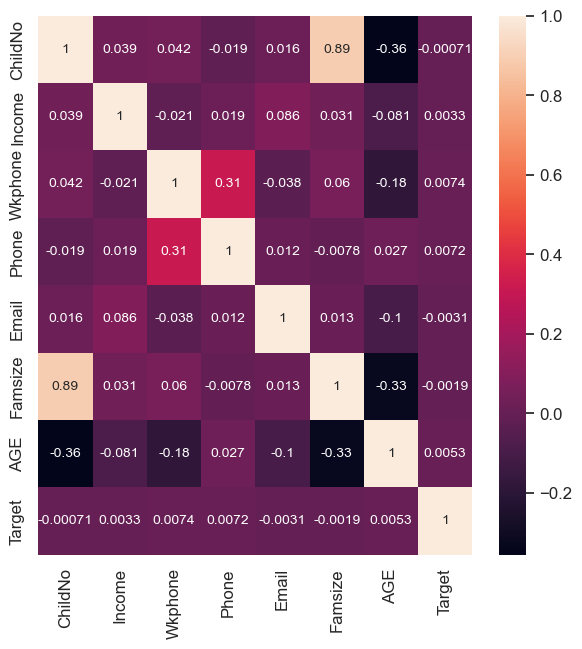

In [24]:
# Use heatmap to show the correlation 
heatmap=sns.heatmap(corr_matrix, annot=True, annot_kws={"fontsize":10})
plt.show()

In [25]:
# remove Column Family_size as it is 90% related to ChildNo Collumn, we want the model to not give it any weight to neglect its importance
df = df.drop(['Famsize'], axis=1)

In [26]:
# Dimension of the dataframe
df.shape

(777715, 15)

In [27]:
df['ChildNo'].value_counts()

0     540639
1     155638
2      70399
3       9328
4       1224
5        324
14       111
7         46
19         6
Name: ChildNo, dtype: int64

In [28]:
# List the numerical and categorical columns

num_cols = [col for col in df.columns if df[col].dtype!='O']
str_cols = [col for col in df.columns if df[col].dtype=='O']

print ('Numerical columns are ', num_cols)
print ('Categorical columns are ', str_cols)


Numerical columns are  ['ChildNo', 'Income', 'Wkphone', 'Phone', 'Email', 'AGE', 'Target']
Categorical columns are  ['Gender', 'Own_car', 'Own_property', 'Income_type', 'Education', 'Family_status', 'Housing_type', 'Occupation_type']


### Data Exploration

#### Plot all features in the dataset to check distribution using a histogram

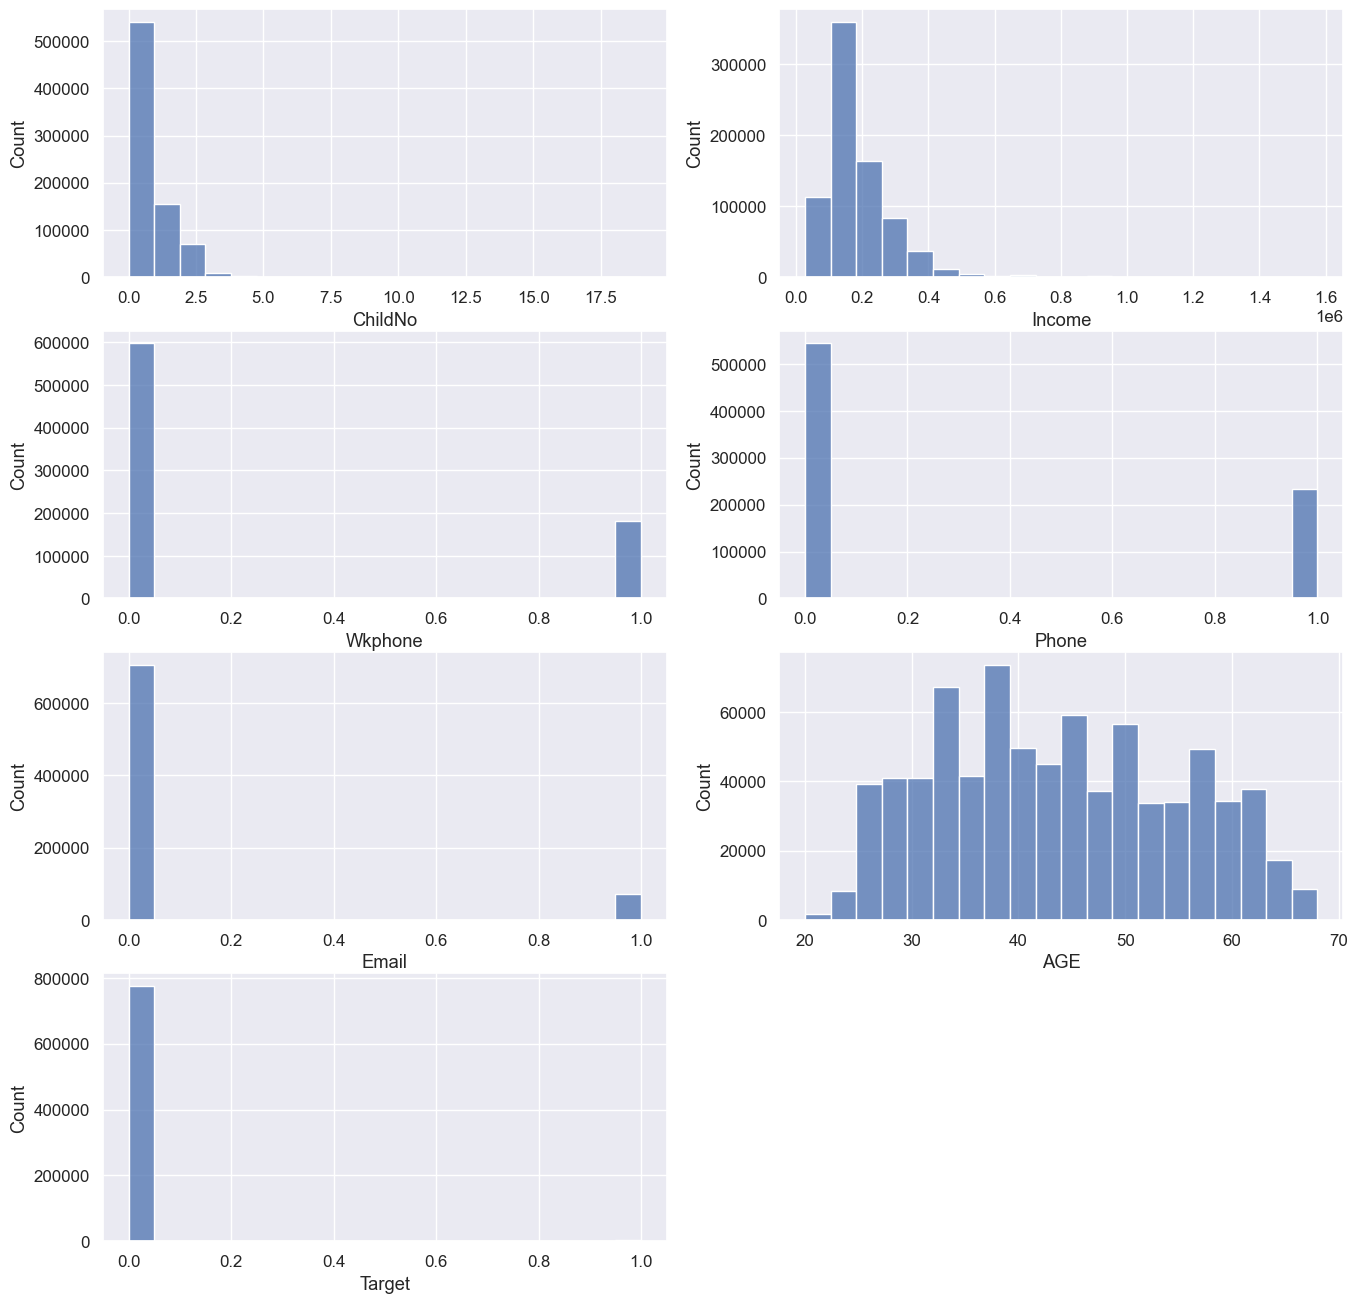

In [29]:
# show the distribution of values in each column of the dataframe
# plot the vales
plt.figure(figsize=(16,16))
for i in range(1,8):
    plt.subplot(4,2,i)
    sns.histplot(df[num_cols[i-1]], bins=20)

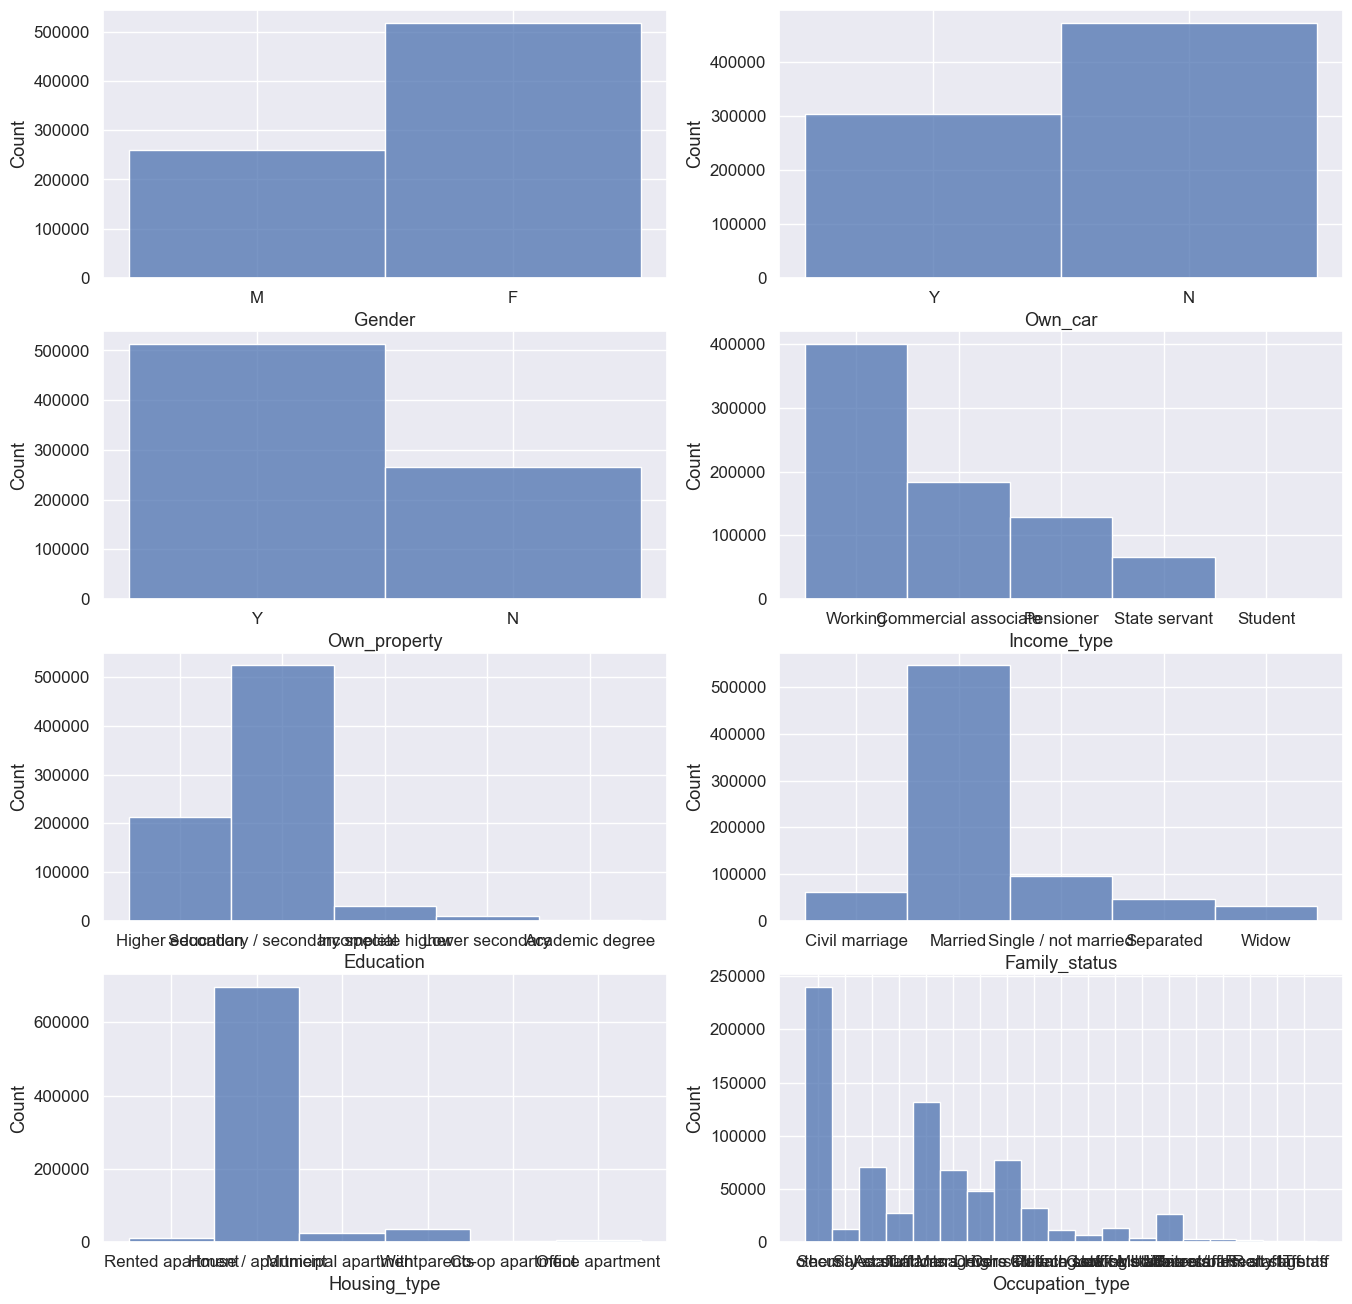

In [30]:
# Check the distribution of non-numerical columns. 
plt.figure(figsize=(16,16))
for i in range(1,9):
    plt.subplot(4,2,i)
    sns.histplot(df[str_cols[i-1]], bins=20)

#### More graphs below to show the clustering clearly

In [31]:
# Define the functions showing more visualizations

def categorical_plotting(df,col,title):
    fig, ax = plt.subplots(figsize=(8,4))
    ax=sns.countplot(x=col, data=df, palette='flare', order = df[col].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()

def numerical_plotting(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.distplot(df[col],kde=True)
    plt.xticks(rotation=45)
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()  
    
def average_plotting(df,col,output,number,title):
    data_list = df[col].value_counts().index[:number].tolist()
    plt.figure(figsize=(8,6))
    ax=sns.barplot(x=col, y=output, data=df[df[col].isin(data_list)],order=data_list,palette='flare',ci=False,edgecolor="black") 
    plt.xticks(rotation=45);
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()


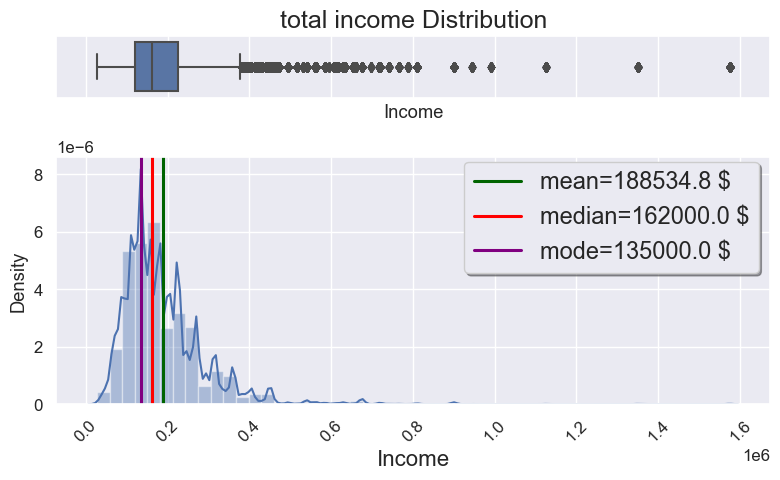

In [32]:
# Visulize the distribution of the income
numerical_plotting(df,'Income','total income Distribution',' $')

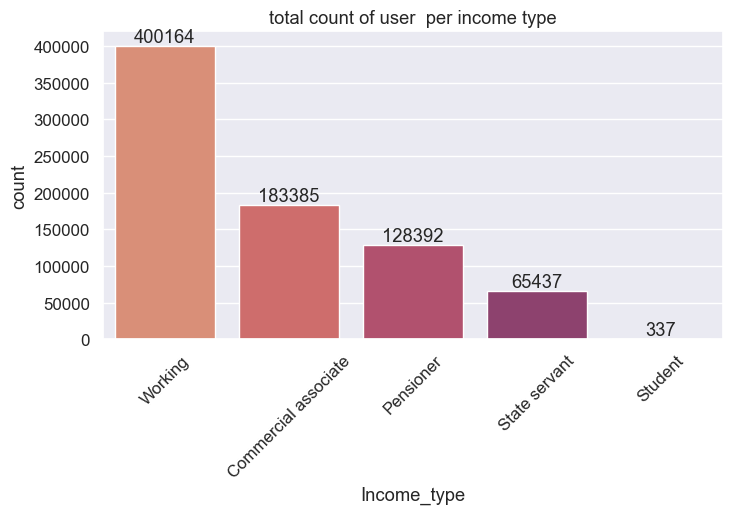

In [33]:
categorical_plotting(df,'Income_type','total count of user  per income type')

In [34]:
# what is the average income in each income type?
df.groupby('Income_type').mean()[['Income']].sort_values(by='Income',ascending=False)

,Income
Income_type,
Commercial associate,220143.080666
State servant,202292.128841
Working,184953.668583
Student,164537.091988
Pensioner,147600.830870


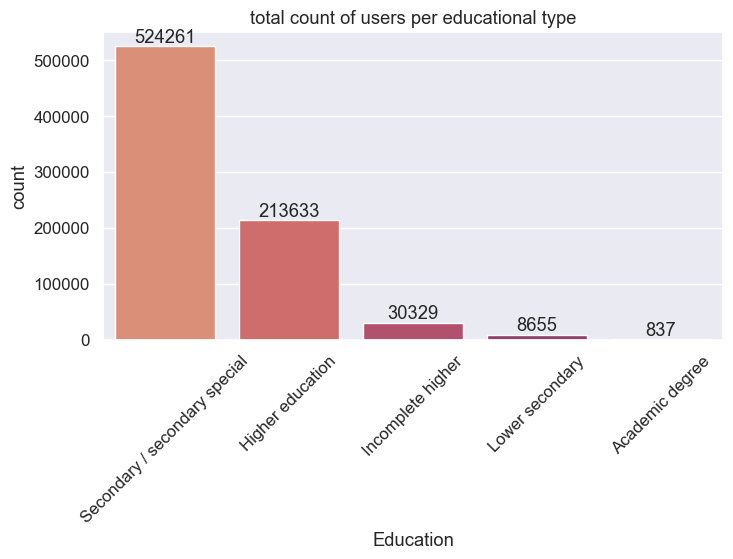

In [35]:
# plot the education distribution
categorical_plotting(df,'Education','total count of users per educational type')

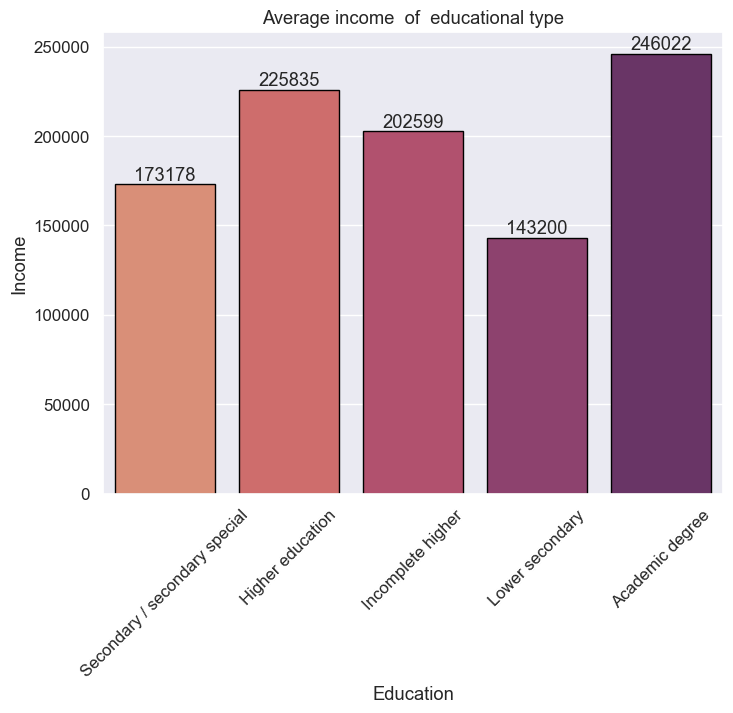

In [36]:
# plot the average income of education types
average_plotting(df,'Education','Income',15,'Average income  of  educational type')

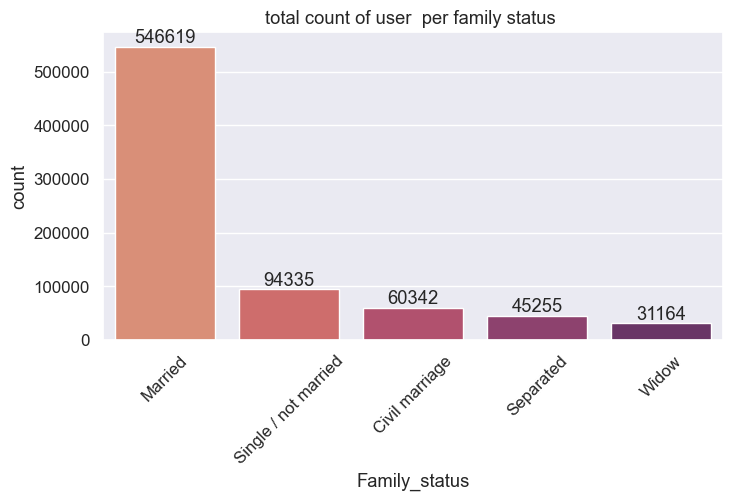

In [37]:
# plot the family status distribution
categorical_plotting(df,'Family_status','total count of user  per family status ')

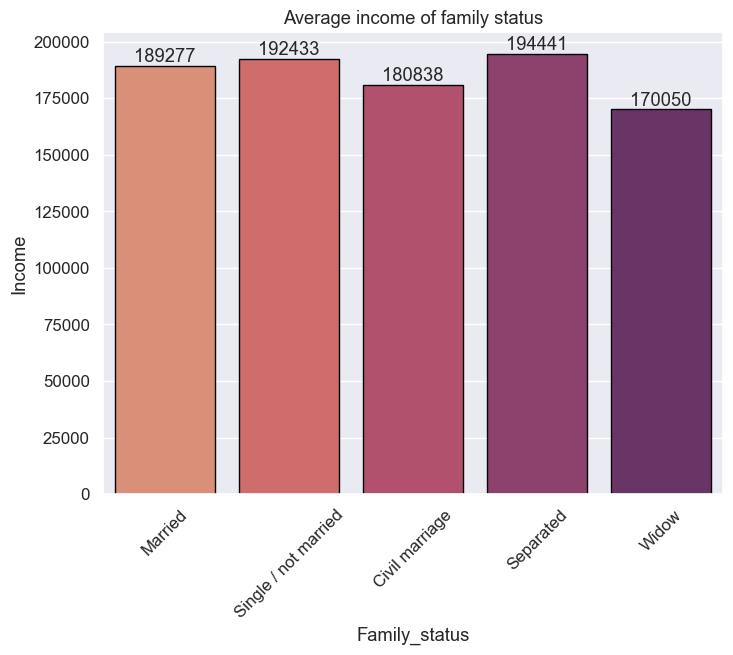

In [38]:
# plot the average income of family status
average_plotting(df,'Family_status','Income',15,'Average income of family status')

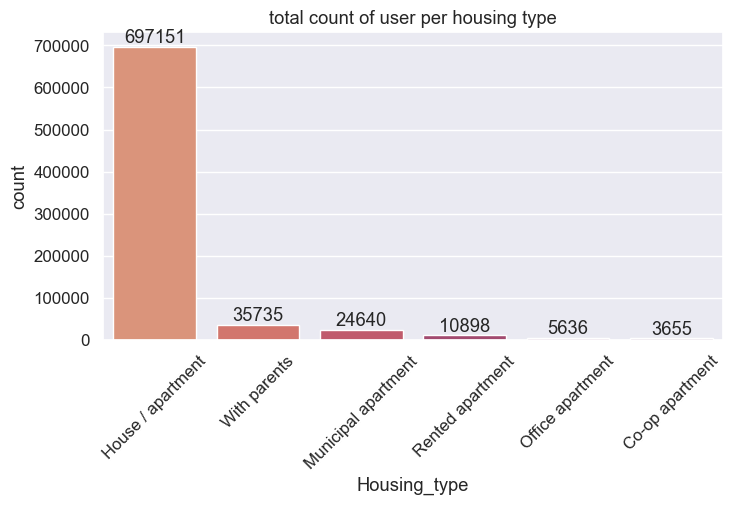

In [39]:
# plot the housing types distribution
categorical_plotting(df,'Housing_type','total count of user per housing type')

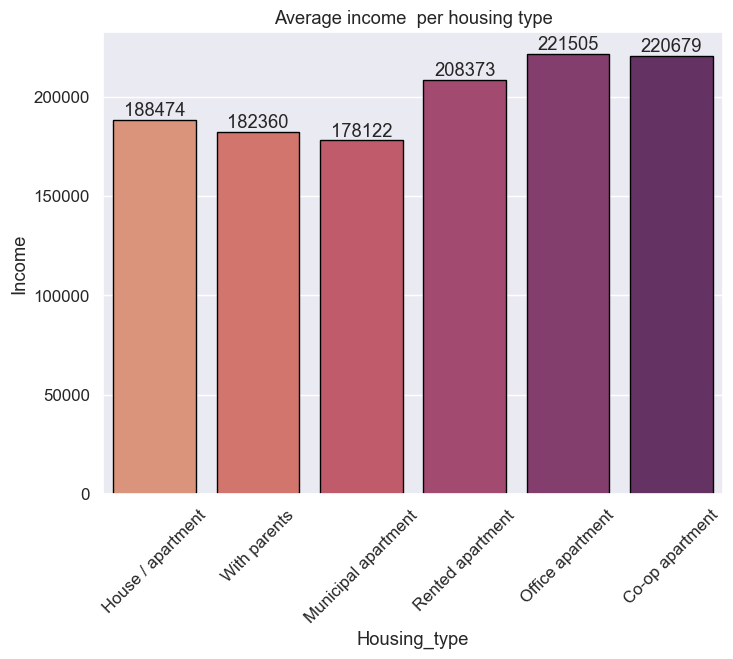

In [40]:
# plot average income per housing types
average_plotting(df,'Housing_type','Income',15,'Average income  per housing type')

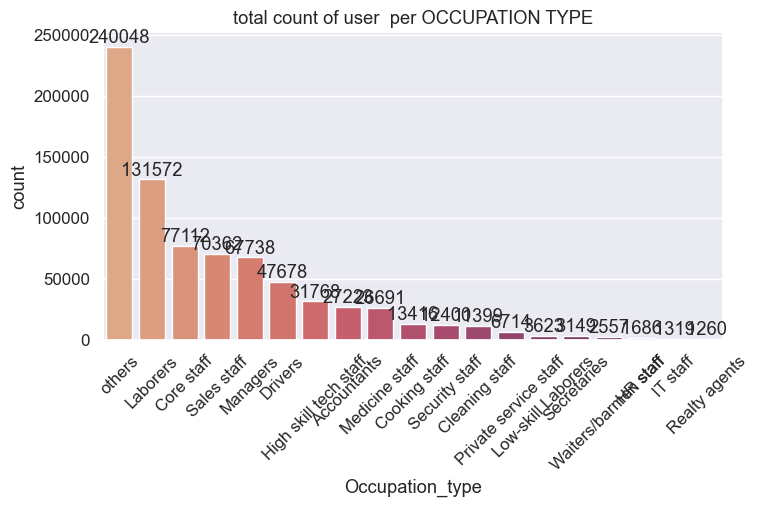

In [41]:
# plot occupation types distribution
categorical_plotting(df,'Occupation_type','total count of user  per OCCUPATION TYPE')

#### Data visulizations above show that there are imbalanced classes that need to be revised to prevent overfitting. 

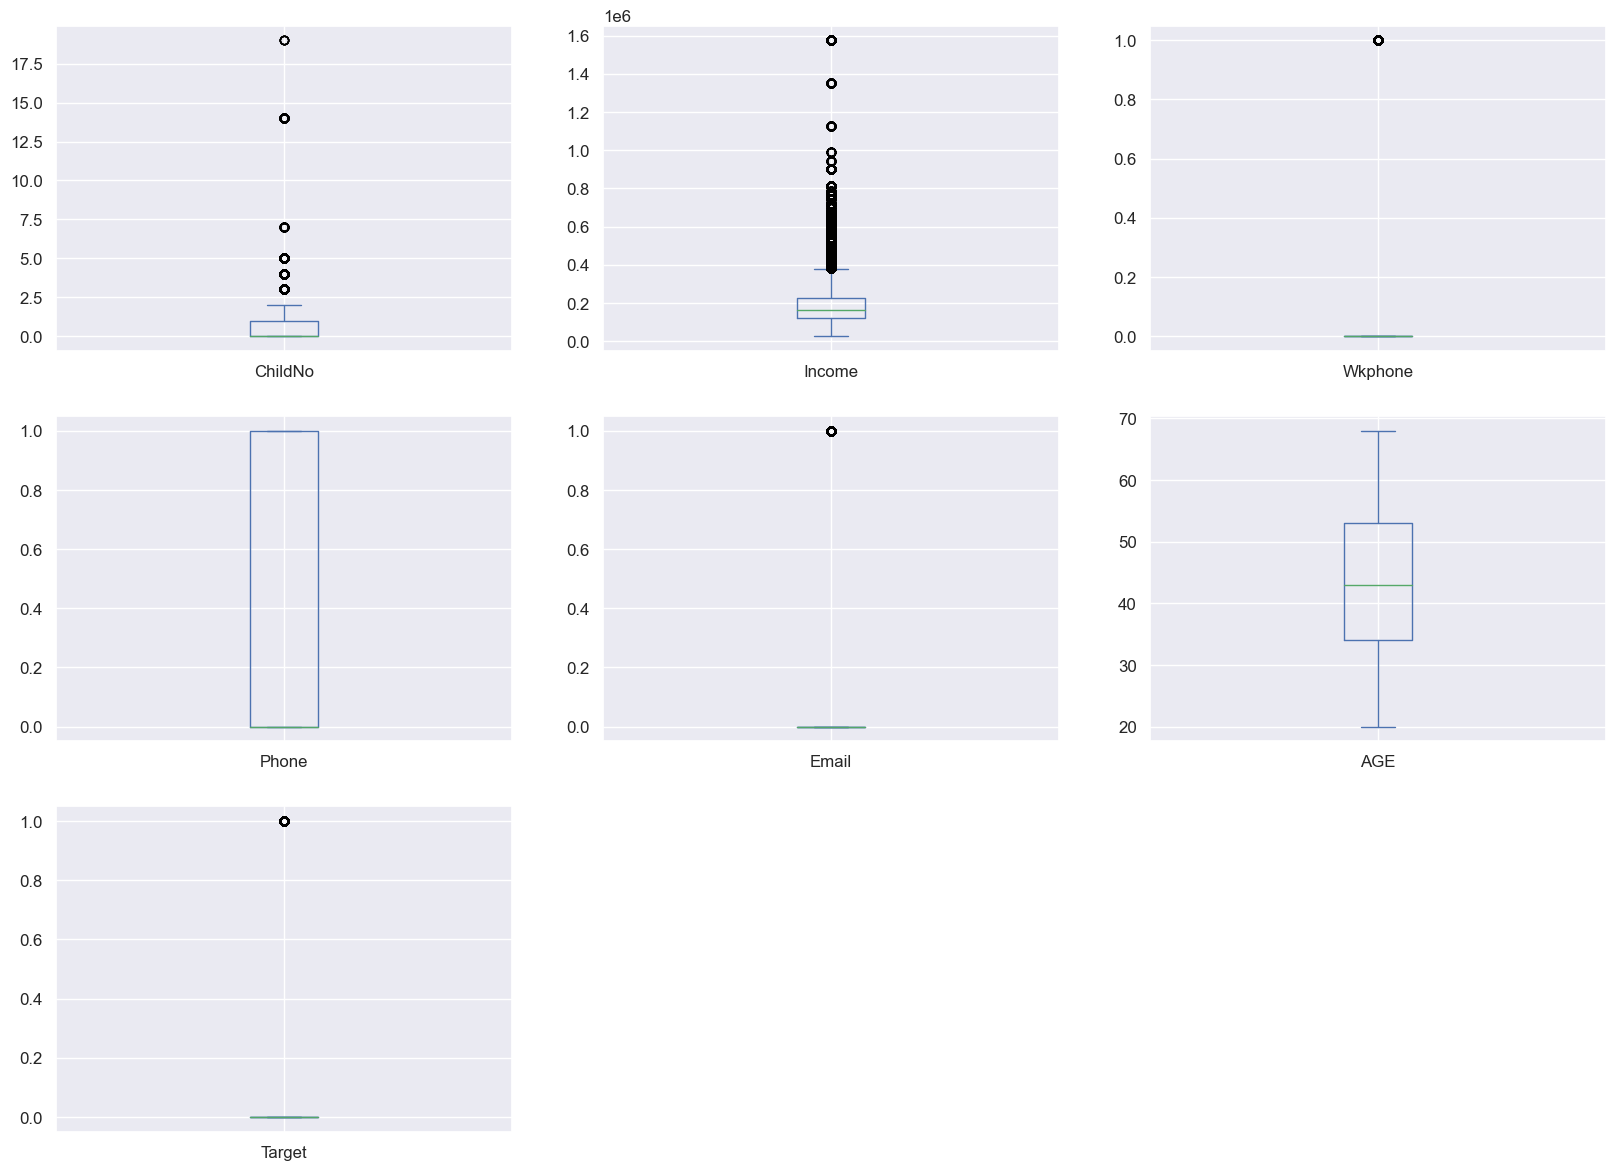

In [42]:
# Show horizontal box plots of each column in the dataframe
df.plot(kind='box', subplots=True, layout=(12,3), sharex=False, sharey=False, figsize=(20, 60))
plt.show()

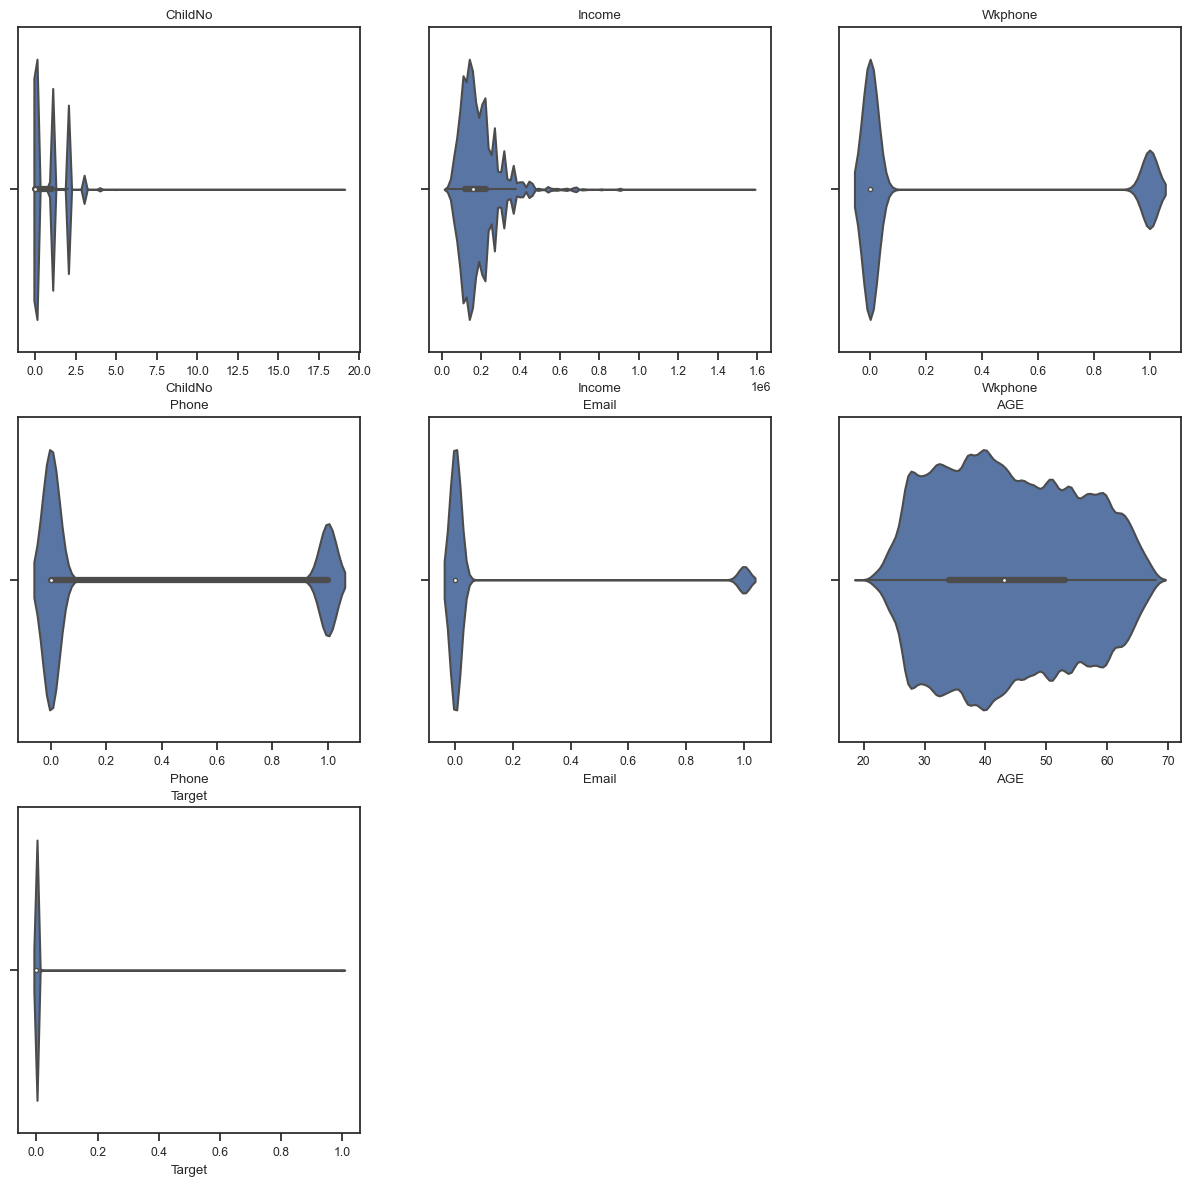

In [43]:
# create the violin plot to display the distribution and density of data
num_cols = df.select_dtypes(include='number').columns

sns.set_context("notebook", font_scale=0.8)
sns.set_style("ticks")

fig = plt.figure(figsize=(15, 60))
for i, column in enumerate(num_cols):
    plt.subplot(12, 3, i+1)
    sns.violinplot(x=column, data=df[num_cols])
    plt.title(column)
plt.show()

#### Label Encoder and Dummies Function to convert categorical data 

In [44]:
# start label encoder
column_data = [ "Gender","Own_car", "Own_property", "Income_type", "Education", "Family_status", "Housing_type"]
for col in column_data:
    label = LabelEncoder()
    df[col] = label.fit_transform(df[col].values)

In [45]:
# change the Occupation_type to numberical value by using get_dummies
df = pd.get_dummies(df, drop_first = True, columns=['Occupation_type'])

In [46]:
# check the result
df.head()

,Gender,Own_car,Own_property,ChildNo,Income,Income_type,Education,Family_status,Housing_type,Wkphone,...,Occupation_type_Low-skill Laborers,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Private service staff,Occupation_type_Realty agents,Occupation_type_Sales staff,Occupation_type_Secretaries,Occupation_type_Security staff,Occupation_type_Waiters/barmen staff,Occupation_type_others
0,1,1,1,0,427500.0,4,1,0,4,1,...,0,0,0,0,0,0,0,0,0,1
1,1,1,1,0,427500.0,4,1,0,4,1,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,0,427500.0,4,1,0,4,1,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1,0,427500.0,4,1,0,4,1,...,0,0,0,0,0,0,0,0,0,1
4,1,1,1,0,427500.0,4,1,0,4,1,...,0,0,0,0,0,0,0,0,0,1


#### Outliers Removal

In [47]:
# create a copy of the dataframe
df_final = df.copy()

# Create the Target column and reset the index
target = df_final['Target'].reset_index(drop=True)

# Create dataframe without Target column and reset index 
features = df_final.drop('Target', axis=1).reset_index(drop=True)

In [48]:
# Fit an isolation forest to the features dataframe
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
isolation_forest.fit(features)
y_noano = isolation_forest.predict(features)

In [49]:
# get cleaned feature indices
cleaned_feature_indices = features.index[y_noano == 1]

In [50]:
# Combine the target column with the cleaned feature columns
df_final = pd.concat([target.iloc[cleaned_feature_indices], features.iloc[cleaned_feature_indices]], axis=1)

In [51]:
# Print the number of rows in the dataframe before and after isolation forest outlier removal
print("PRE ISOLATION FOREST OUTLIER REMOVAL ROWS: {}".format(df.shape[0]))
print("POST ISOLATION FOREST OUTLIER REMOVAL ROWS: {}".format(df_final.shape[0]))

PRE ISOLATION FOREST OUTLIER REMOVAL ROWS: 777715
POST ISOLATION FOREST OUTLIER REMOVAL ROWS: 700270


#### Data Scaling 

In [52]:
# separate the target column apart from the dataset
x = df_final.drop(['Target'], axis=True)
y = df_final['Target']


In [53]:
# data standarization 
sc=StandardScaler()
x_scaled = sc.fit_transform(x)

# transform to dataframe
x_scaled= pd.DataFrame(x_scaled, columns=x.columns)

In [54]:
# Check the dimensionality of the data scaled. 
x_scaled.shape

(700270, 31)

## IV. Modeling and pipelines creation

### Pipeline 1: Dimensionality Reduction using PCA (Principal Component Analysis)

As there are 31 features in the dataframe and PCA can help reduce the number of dimensions in the dataset, reducing overfitting.

In [55]:
# Create a PCA object and fit it to your data
pca = PCA()
pca.fit(x_scaled)

# Determine the number of components needed to retain a certain amount of variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print('Number of components to retain 95% variance:', n_components)

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
pca.fit(x_scaled)

# transfer to dataframe after PCA
columns = ['pca_comp_%i' % i for i in range(n_components)]
x_pca  = pd.DataFrame(pca.transform(x_scaled), columns=columns, index=x_scaled.index)



Number of components to retain 95% variance: 28


In [56]:
# Get the original column names
original_columns = list(x_scaled.columns)

# Create a mapping between the PCA column names and the original column names
mapping = {}
for i in range(len(x_pca.columns)):
    pca_col_name = x_pca.columns[i]
    original_col_name = original_columns[i]
    mapping[pca_col_name] = original_col_name
    
# Rename the columns of the PCA dataframe using the mapping    
x_pca.rename(columns=mapping, inplace=True)

# Check the column name of data after PCA
x_pca.head()

,Gender,Own_car,Own_property,ChildNo,Income,Income_type,Education,Family_status,Housing_type,Wkphone,...,Occupation_type_High skill tech staff,Occupation_type_IT staff,Occupation_type_Laborers,Occupation_type_Low-skill Laborers,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Private service staff,Occupation_type_Realty agents,Occupation_type_Sales staff,Occupation_type_Secretaries
0,0.467369,0.443369,-2.062118,-1.272199,-1.173209,-0.002417,2.030634,-1.659353,-0.14719,-0.699543,...,0.791038,1.577467,-0.125832,-0.62341,0.656832,-0.987262,0.266801,0.862037,-0.835353,-0.4098
1,0.467369,0.443369,-2.062118,-1.272199,-1.173209,-0.002417,2.030634,-1.659353,-0.14719,-0.699543,...,0.791038,1.577467,-0.125832,-0.62341,0.656832,-0.987262,0.266801,0.862037,-0.835353,-0.4098
2,0.467369,0.443369,-2.062118,-1.272199,-1.173209,-0.002417,2.030634,-1.659353,-0.14719,-0.699543,...,0.791038,1.577467,-0.125832,-0.62341,0.656832,-0.987262,0.266801,0.862037,-0.835353,-0.4098
3,0.467369,0.443369,-2.062118,-1.272199,-1.173209,-0.002417,2.030634,-1.659353,-0.14719,-0.699543,...,0.791038,1.577467,-0.125832,-0.62341,0.656832,-0.987262,0.266801,0.862037,-0.835353,-0.4098
4,0.467369,0.443369,-2.062118,-1.272199,-1.173209,-0.002417,2.030634,-1.659353,-0.14719,-0.699543,...,0.791038,1.577467,-0.125832,-0.62341,0.656832,-0.987262,0.266801,0.862037,-0.835353,-0.4098


#### Data Balancing 

#### Oversampling the minority class cause the Gridsearch model executing freezed, so <span style="color:red">undersampling </span>the majority class is chosen for balancing the class.

Class=0, n=2495 (50.000%)
Class=1, n=2495 (50.000%)


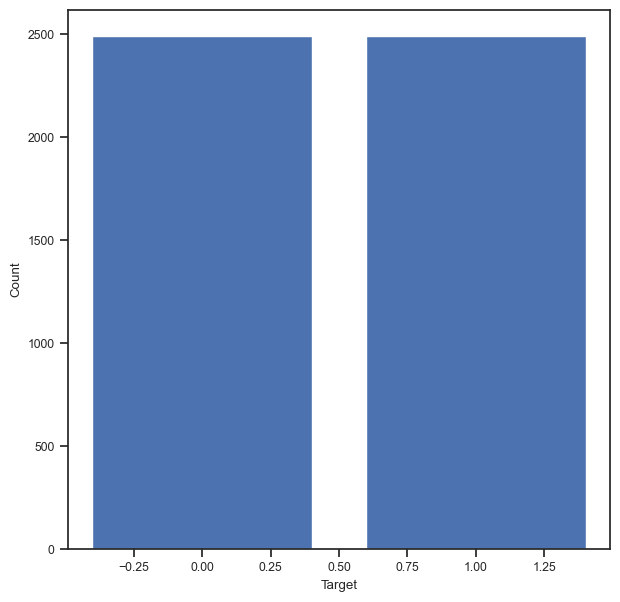

In [57]:
# undersample the majority class

undersample = RandomUnderSampler(random_state=0)
X_balance, Y_balance = undersample.fit_resample(x_pca, y)

# summarize distribution
counter = Counter(Y_balance)
for k,v in counter.items():
	per = v / len(Y_balance) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

### Modeling and Evaluation

#### Model 1: Logistic Regression

In [58]:
# Divide the balanced dataset to x_train, y_train, x_test, y_test
x_train ,x_test ,y_train,y_test = train_test_split(X_balance,Y_balance,test_size=.3,random_state=42,shuffle=True)

In [59]:
# check the dataset dimensionality
print("\n[TRAINING SET FEATURES SHAPE]\n {}".format(x_train.shape))
print("\n[TRAINING SET TARGET SHAPE]\n {}".format(y_train.shape))
print("\n[TESTING SET FEATURES SHAPE]\n {}".format(x_test.shape))
print("\n[TESTING SET TARGET SHAPE]\n {}".format(y_test.shape))


[TRAINING SET FEATURES SHAPE]
 (3493, 28)

[TRAINING SET TARGET SHAPE]
 (3493,)

[TESTING SET FEATURES SHAPE]
 (1497, 28)

[TESTING SET TARGET SHAPE]
 (1497,)


[[442 323]
 [315 417]]
              precision    recall  f1-score   support

           0       0.58      0.58      0.58       765
           1       0.56      0.57      0.57       732

    accuracy                           0.57      1497
   macro avg       0.57      0.57      0.57      1497
weighted avg       0.57      0.57      0.57      1497

Accurcy     using LR  on test Data  : 57.38 %


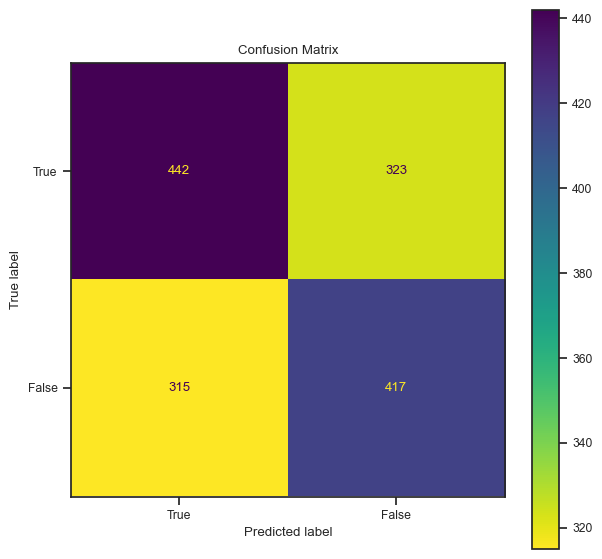

In [60]:
# create an instance of the logistic regression algorithm 
lr = LogisticRegression()
lr.fit(x_train,y_train)

# predict the value by fitting the model
y_pred       = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

# get the accuracy score of the data
score_lr_test=accuracy_score(y_test, y_pred)
score_lr_train=accuracy_score(y_train, y_pred_train)

# Print the result and report
y_true = y_test
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))
print("Accurcy     using LR  on test Data  : {:.2f} %".format(np.round(accuracy_score(y_test, y_pred),4)*100))


# plot the report
disp = plot_confusion_matrix(lr, x_test, y_test,
                              display_labels=['True','False'],
                              cmap=plt.cm.viridis_r)

disp.ax_.set_title('Confusion Matrix')    # set the title of the plot

plt.show()   # show the plot

#### Model 2: KNN

Uses Optuna library to perform hyperparameter tuning for a k-nearest neighbors (KNN) classifier. 

In [61]:
# Create function of optuna to perform hyperparameter tuning
def knn_classifier_optuna (trial,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):
    #define parameters
    params = {
    'n_neighbors'     : trial.suggest_categorical('n_neighbors', [1,3,5,7]), 
    'weights'         : trial.suggest_categorical('weights', ['uniform','distance']),
    'algorithm'       : trial.suggest_categorical('algorithm',['auto','ball_tree','kd_tree','brute']),
    'leaf_size'       : trial.suggest_int('leaf_size', 30, 150),
    'p'               : trial.suggest_int('p', 2, 50),
    
    }
    #creat model and pass parameters 
    model = KNeighborsClassifier(**params) 
    model = KNeighborsClassifier(**params) 
    model.fit(x_train, y_train) 
    predection = model.predict(x_test)
    acc = accuracy_score(y_test, predection)
    return acc


# create an Optuna study object 
study = optuna.create_study(direction="minimize")
# search for the optimal hyperparameters of a KNN classifier
study.optimize(knn_classifier_optuna, n_trials=100)




[I 2023-04-04 22:21:46,948] A new study created in memory with name: no-name-7eb1cb91-6714-46e1-85d5-9be153c3242f
[I 2023-04-04 22:21:47,967] Trial 0 finished with value: 0.8610554442217769 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 102, 'p': 16}. Best is trial 0 with value: 0.8610554442217769.
[I 2023-04-04 22:21:50,747] Trial 1 finished with value: 0.8470273881095525 and parameters: {'n_neighbors': 3, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 150, 'p': 14}. Best is trial 1 with value: 0.8470273881095525.
[I 2023-04-04 22:21:51,897] Trial 2 finished with value: 0.7942551770207081 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 80, 'p': 8}. Best is trial 2 with value: 0.7942551770207081.
[I 2023-04-04 22:21:52,583] Trial 3 finished with value: 0.8617234468937875 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 49, 'p': 50}. Best 

[I 2023-04-04 22:22:44,483] Trial 33 finished with value: 0.7922511690046761 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 114, 'p': 11}. Best is trial 17 with value: 0.7915831663326653.
[I 2023-04-04 22:22:46,021] Trial 34 finished with value: 0.7969271877087508 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 116, 'p': 6}. Best is trial 17 with value: 0.7915831663326653.
[I 2023-04-04 22:22:47,544] Trial 35 finished with value: 0.7942551770207081 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 127, 'p': 15}. Best is trial 17 with value: 0.7915831663326653.
[I 2023-04-04 22:22:47,639] Trial 36 finished with value: 0.8570474281897128 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 41, 'p': 2}. Best is trial 17 with value: 0.7915831663326653.
[I 2023-04-04 22:22:49,161] Trial 37 finished with value: 0.79358

[I 2023-04-04 22:23:34,423] Trial 67 finished with value: 0.7922511690046761 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 115, 'p': 4}. Best is trial 17 with value: 0.7915831663326653.
[I 2023-04-04 22:23:35,224] Trial 68 finished with value: 0.8837675350701403 and parameters: {'n_neighbors': 1, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 131, 'p': 3}. Best is trial 17 with value: 0.7915831663326653.
[I 2023-04-04 22:23:37,831] Trial 69 finished with value: 0.7975951903807615 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 115, 'p': 5}. Best is trial 17 with value: 0.7915831663326653.
[I 2023-04-04 22:23:40,610] Trial 70 finished with value: 0.822311289245157 and parameters: {'n_neighbors': 5, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 31, 'p': 6}. Best is trial 17 with value: 0.7915831663326653.
[I 2023-04-04 22:23:41,807] Trial 71 finished with value: 0.792251

In [62]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")

params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

Number of finished trials:  100
Best trial:
  Value: 0.7915831663326653
  Params: 
    n_neighbors: 7
    weights: uniform
    algorithm: kd_tree
    leaf_size: 34
    p: 9


In [63]:
# fit the KNN model with the best parameter above
knn_best = KNeighborsClassifier(n_neighbors=7,weights='uniform',algorithm='kd_tree',leaf_size=132,p=10)

knn_best.fit(x_train,y_train)
y_pred_knn = knn_best.predict(x_test)
y_pred_train_knn  = knn_best.predict(x_train)

# get the accuracy scores of the predicted value  
score_knn_train=accuracy_score(y_train, y_pred_train_knn)
score_knn_test=accuracy_score(y_test, y_pred_knn)


[[562 203]
 [110 622]]
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       765
           1       0.75      0.85      0.80       732

    accuracy                           0.79      1497
   macro avg       0.80      0.79      0.79      1497
weighted avg       0.80      0.79      0.79      1497

Accurcy     using KNN  on test Data   : 79.09 %


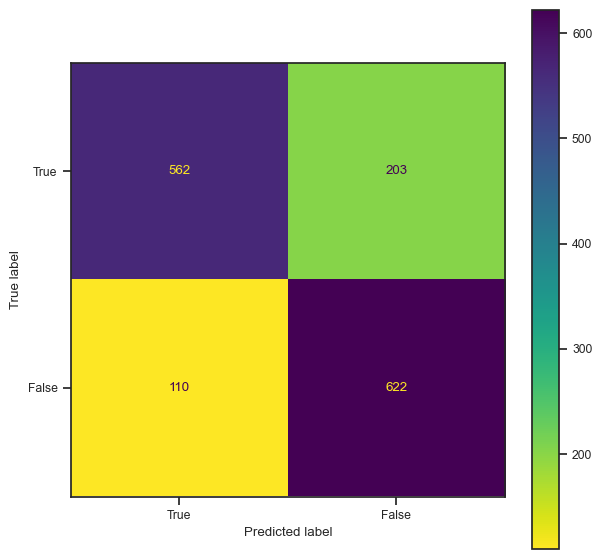

In [64]:
# Print the result and report
print(confusion_matrix(y_true, y_pred_knn))
print(classification_report(y_true, y_pred_knn))
print("Accurcy     using KNN  on test Data   : {:.2f} %".format(np.round(accuracy_score(y_test, y_pred_knn),4)*100))

# plot the result

disp = plot_confusion_matrix(knn_best, x_test, y_test,
                              display_labels=['True','False'],
                              cmap=plt.cm.viridis_r)

#### Model 3: Decision Tree

In [65]:
# Create a decision tree object
dt = DecisionTreeClassifier()

# Define the parameter grid 
param_grid = {
    'max_depth': [1, 2, 3, 4, 5,6,7],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],
    'criterion': ['gini', 'entropy']
}
    
# Create a GridSearchCV object
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
    
# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and corresponding mean cross-validation score
print('Best hyperparameters: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)


Best hyperparameters:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 3}
Best score:  0.7509233411627745


[[586 179]
 [155 577]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       765
           1       0.76      0.79      0.78       732

    accuracy                           0.78      1497
   macro avg       0.78      0.78      0.78      1497
weighted avg       0.78      0.78      0.78      1497

Accurcy     using DT  on test Data   : 77.69 %


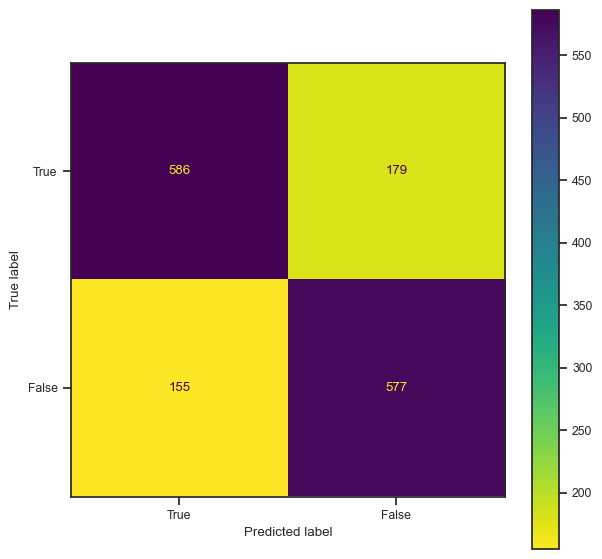

In [66]:
# Fit the best parameter 
dt_best = DecisionTreeClassifier(criterion='gini',max_depth=7, min_samples_split= 5,min_samples_leaf= 2)
dt_best.fit(x_train,y_train)

# get the accuracy result
y_pred_dt = dt_best.predict(x_test)
y_pred_train_dt = dt_best.predict(x_train)
accuracy_test = accuracy_score(y_test, y_pred_dt)
accuracy_train = accuracy_score(y_train, y_pred_train_dt)

# Print the result and report
print(confusion_matrix(y_true, y_pred_dt))
print(classification_report(y_true, y_pred_dt))
print("Accurcy     using DT  on test Data   : {:.2f} %".format(np.round(accuracy_score(y_test, y_pred_dt),4)*100))

# Plot the result
disp = plot_confusion_matrix(dt_best, x_test, y_test,
                              display_labels=['True','False'],
                              cmap=plt.cm.viridis_r)

#### Model 4: Decision Tree + Kfold  + Bagging

In [67]:
# Using Bagging Lets build 100 decision tree models and average/majority vote prediction

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)   # create an instance of "stratifiedKfold"
num_trees = 100        # specifies the number of trees

# create a bagging classifier and fit it to the training data 
clf_DT_Bag = BaggingClassifier(base_estimator=dt_best, n_estimators=num_trees, random_state=42).fit(x_train,y_train)

# perform k-fold cross-validation on the model
results_bag = cross_validate(clf_DT_Bag, x_train, y_train, cv=kfold, return_train_score=True)

# calculate accuracy score 
y_pred_dt_bag= clf_DT_Bag.predict(x_test)
score_dtbag_train=results_bag['train_score'].mean()
score_dtbag_test=metrics.accuracy_score(y_pred_dt_bag, y_test)


In [68]:
# compare the result of 2 DT models

print("Accuracy using Decision Tree- best parameter - Test : ", accuracy_test)
print("Accuracy using Decision Tree- best parameter - Train :", accuracy_train)
print ("Accuracy using Decision Tree (Bagging) - Test : ", score_dtbag_test)
print ("Accuracy using Decision Tree (Bagging) - Train : ", score_dtbag_train)


Accuracy using Decision Tree- best parameter - Test :  0.7768871075484302
Accuracy using Decision Tree- best parameter - Train : 0.8296593186372746
Accuracy using Decision Tree (Bagging) - Test :  0.8697394789579158
Accuracy using Decision Tree (Bagging) - Train :  0.9126108720065872


For the Decision Tree, the model performs slightly better on the training data than on the test data, but overall it has an accuracy of around 78%.  <br> 
For the Decision Tree with Bagging, This model has a higher accuracy than the previous one, and it also performs better on the test data, indicating that it may generalize better to new, unseen data.

In [69]:
# Print the result and report
print(confusion_matrix(y_true, y_pred_dt_bag))
print(classification_report(y_true, y_pred_dt_bag))

[[683  82]
 [113 619]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       765
           1       0.88      0.85      0.86       732

    accuracy                           0.87      1497
   macro avg       0.87      0.87      0.87      1497
weighted avg       0.87      0.87      0.87      1497



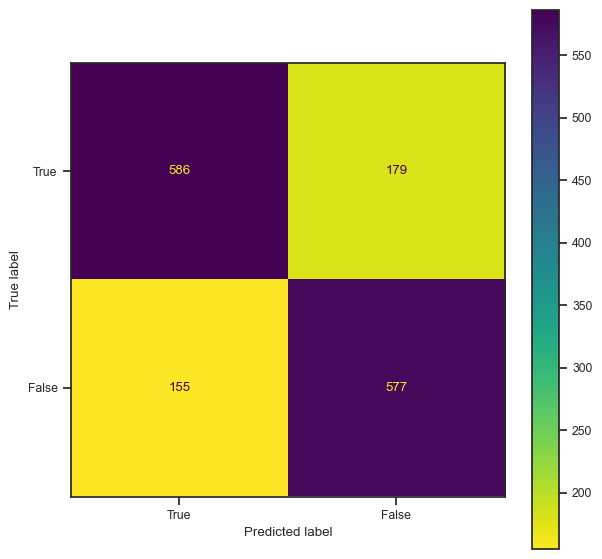

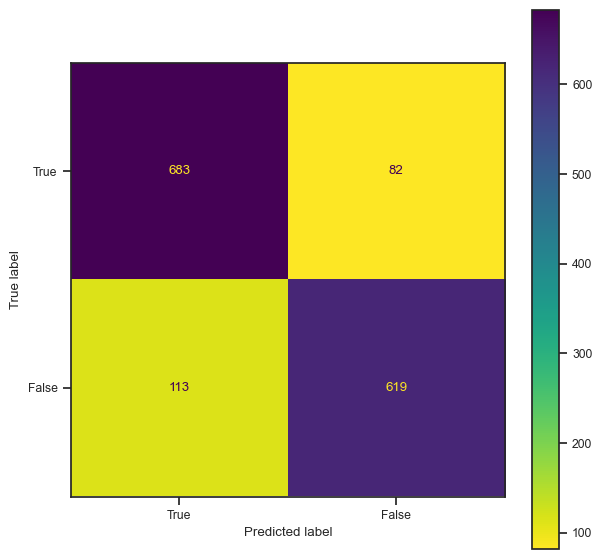

In [70]:
# compare 2 models of DT
dt_models = [dt_best,clf_DT_Bag]

for i in dt_models:
    disp = plot_confusion_matrix(i, x_test, y_test,
                              display_labels=['True','False'],
                              cmap=plt.cm.viridis_r)

#### Model 5: Random Forest 

In [71]:
# create stratifiedfold instance 
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# specifie number of trees
num_trees = 100

# create RF classsifier and fit it to the training data
clf_RF = RandomForestClassifier(n_estimators=num_trees).fit(x_train, y_train)

# get the accuracy result 
results = cross_validate(clf_RF, x_train, y_train, cv=kfold, return_train_score=True)
y_pred_rf= clf_RF.predict(x_test)
score_rf_train = results['train_score'].mean()
score_rf_test = metrics.accuracy_score(clf_RF.predict(x_test), y_test)

print("\nAccuracy using Random Forest - Train : ", score_rf_train)
print("Accuracy using Random Forest - Test : ", score_rf_test)



Accuracy using Random Forest - Train :  0.9769539890616616
Accuracy using Random Forest - Test :  0.9231796927187709


              precision    recall  f1-score   support

           0       0.94      0.91      0.92       765
           1       0.91      0.93      0.92       732

    accuracy                           0.92      1497
   macro avg       0.92      0.92      0.92      1497
weighted avg       0.92      0.92      0.92      1497



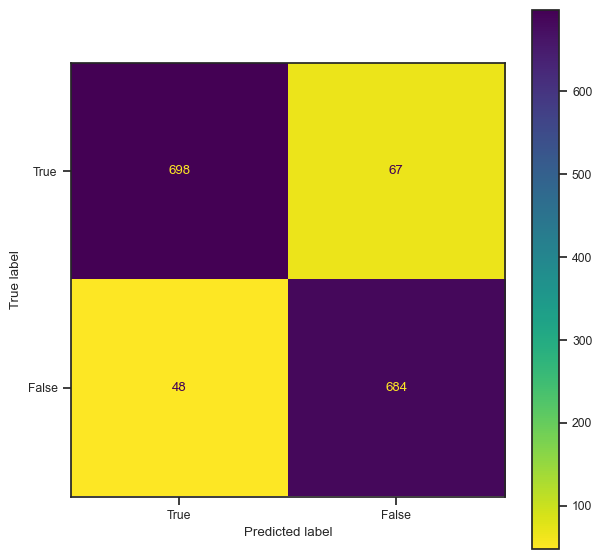

In [72]:
print(classification_report(y_true, y_pred_rf))

# Plot the result
disp = plot_confusion_matrix(clf_RF, x_test, y_test,
                              display_labels=['True','False'],
                              cmap=plt.cm.viridis_r)

check the feature importances to identify which impact the model's performance greatest.

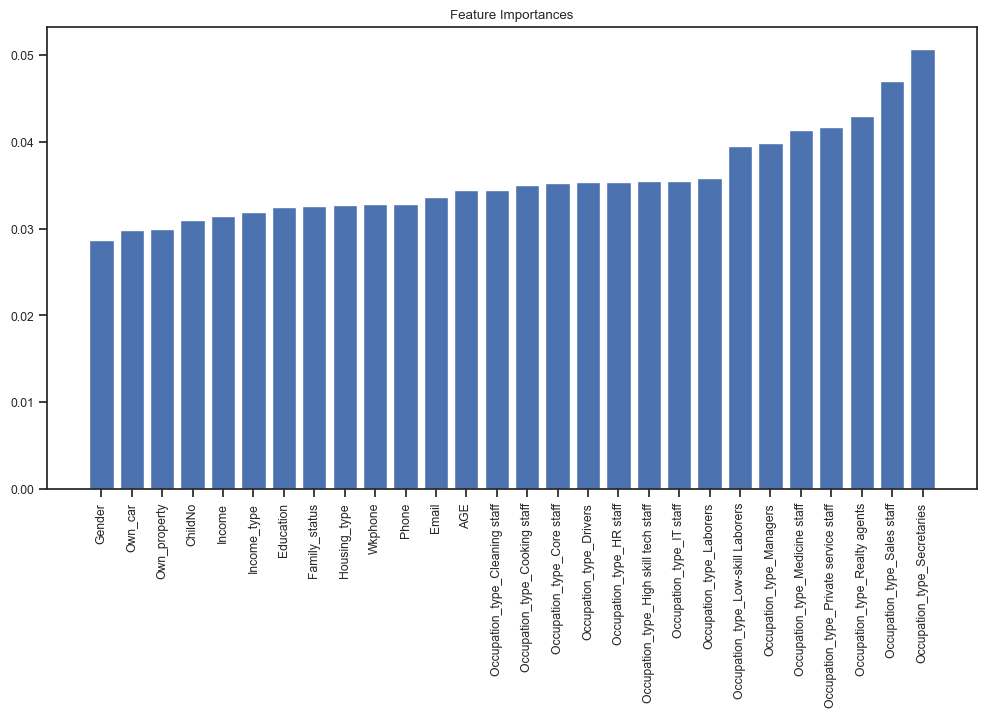

In [73]:
feature_importances = clf_RF.feature_importances_  # get feature importance from the Random Forest model
feature_names = list(x_pca.columns)                 # get the names of features
indices = feature_importances.argsort()             # sort the features by importance

# plot the feature importance
plt.figure(figsize=(12,6))
plt.title("Feature Importances")
plt.bar(range(x_pca.shape[1]), feature_importances[indices])
plt.xticks(range(x_pca.shape[1]), feature_names, rotation=90)
plt.show()

#### Model 6: XGBoost

In [74]:
# Define XGBoost model with default parameters
xgb_model = xgb.XGBClassifier()

# Define parameter grid
params = {
    "learning_rate": [0.1, 0.01, 0.001],
    "max_depth": [3, 5, 7],
    "n_estimators": [50, 100, 200]
}

In [75]:
# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=params,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [76]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best score: 0.9106796036909051


In [77]:
# Define the best hyperparameters found from grid search
best_params = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

# Create an XGBoost regressor object with the best hyperparameters
xgb_best = xgb.XGBClassifier(**best_params)

# Fit the XGBoost model to the training data
xgb_best.fit(x_train, y_train)


# Evaluate the model on the training and testing data
train_score_xgb = xgb_best.score(x_train, y_train)
test_score_xgb = xgb_best.score(x_test, y_test)
y_pred_xgb = xgb_best.predict(x_test)
print("\nAccuracy using XGBoosting Model Training score: ", train_score_xgb)
print("\nAccuracy using XGBoosting Model Testing score: ", test_score_xgb)


Accuracy using XGBoosting Model Training score:  0.9745204695104495

Accuracy using XGBoosting Model Testing score:  0.918503674014696


              precision    recall  f1-score   support

           0       0.94      0.90      0.92       765
           1       0.90      0.93      0.92       732

    accuracy                           0.92      1497
   macro avg       0.92      0.92      0.92      1497
weighted avg       0.92      0.92      0.92      1497



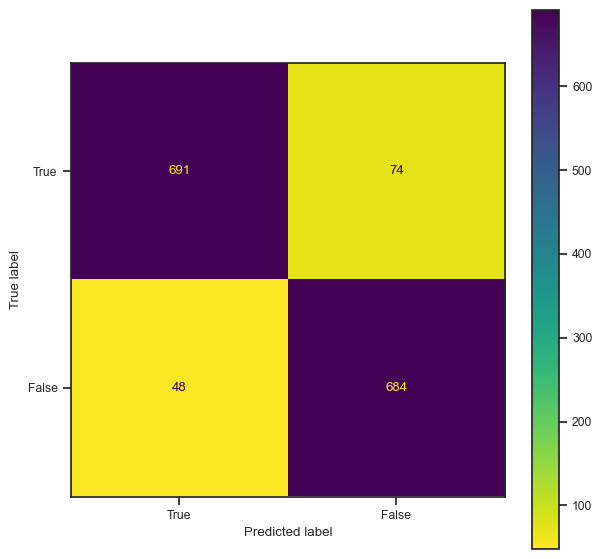

In [78]:
# plot the result
print(classification_report(y_true, y_pred_xgb))

disp = plot_confusion_matrix(xgb_best, x_test, y_test,
                              display_labels=['True','False'],
                              cmap=plt.cm.viridis_r)


In [79]:
data =  {'Model Name':['Linear Regression','KNN','DT','DT-BAG','RF','XGBoost'],
         'Training Score':[score_lr_train,score_knn_train, accuracy_train, score_dtbag_train, score_rf_train, train_score_xgb ],
         'Testing Score':[score_lr_test, score_knn_test, accuracy_test, score_dtbag_test, score_rf_test, test_score_xgb]
        }

In [80]:
df_model = pd.DataFrame(data)
df_model

,Model Name,Training Score,Testing Score
0,Linear Regression,0.612368,0.573814
1,KNN,0.843401,0.790915
2,DT,0.829659,0.776887
3,DT-BAG,0.912611,0.869739
4,RF,0.976954,0.923180
5,XGBoost,0.974520,0.918504


Random Forest model has the highest training and testing scores, indicating that it is the best performing model among the models that were evaluated. <br><br>The Linear Regression model has the lowest training and testing scores, suggesting that it is not a good fit for the dataset. <br><br> KNN, Decision Tree, Decision Tree with Bagging, and XGBoosting, also have relatively high training and testing scores, indicating that they may be viable alternatives to the Random Forest model.

#### Plot the ROC curve for each model


In [81]:
# get the predicted probabilites of the positive calss for the test set in all models
y_pred_prob_lr = lr.predict_proba(x_test)[:,1]
y_pred_prob_knn = knn_best.predict_proba(x_test)[:,1]
y_pred_prob_dt = dt_best.predict_proba(x_test)[:,1]
y_pred_prob_dt_bagging = clf_DT_Bag.predict_proba(x_test)[:,1]
y_pred_prob_rf = clf_RF.predict_proba(x_test)[:,1]
y_pred_prob_xgb = xgb_best.predict_proba(x_test)[:,1]

In [82]:
# Calculate the ROC curve and AUC score for each model
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_true, y_pred_prob_lr)
auc_lr = roc_auc_score(y_true, y_pred_prob_lr)


fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_true, y_pred_prob_knn)
auc_knn = roc_auc_score(y_true, y_pred_prob_knn)

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_true, y_pred_prob_dt)
auc_dt = roc_auc_score(y_true, y_pred_prob_dt)

fpr_dt_bagging, tpr_dt_bagging, thresholds_dt_bagging = roc_curve(y_true, y_pred_prob_dt_bagging)
auc_dt_bagging= roc_auc_score(y_true, y_pred_prob_dt_bagging)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_true, y_pred_prob_rf)
auc_rf = roc_auc_score(y_true, y_pred_prob_rf)

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_true, y_pred_prob_xgb)
auc_xgb = roc_auc_score(y_true, y_pred_prob_xgb)

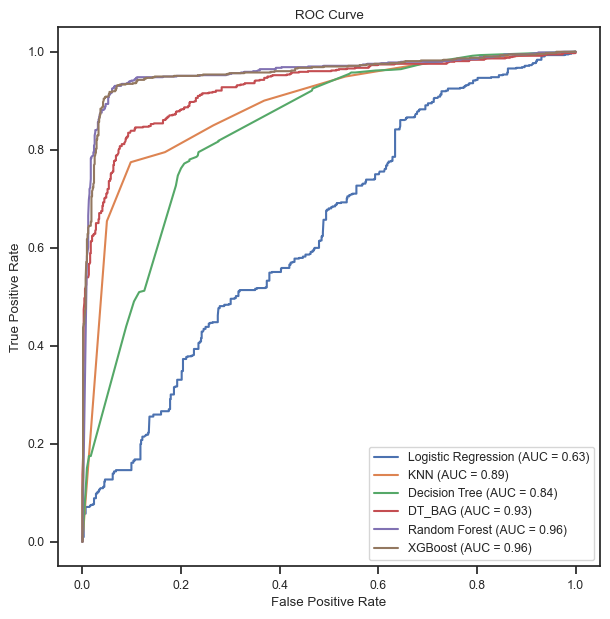

In [83]:
# Plot the ROC curve for each model
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(auc_lr))
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f})'.format(auc_knn))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(auc_dt))
plt.plot(fpr_dt_bagging, tpr_dt_bagging, label='DT_BAG (AUC = {:.2f})'.format(auc_dt_bagging))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(auc_rf))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.2f})'.format(auc_xgb))


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Random Forest model and XGBoosting has the highest AUC score, indicating they have the best overall performance compared to other models. <br> <br> Logistic Regression and KNN models have the lowest AUC score, indicating their performance is relatively poor compared to other models.

### Pipeline 2: Dataset without using PCA 

#### Data Balancing 

#### Oversampling the minority class cause the Gridsearch model executing freezed, so undersampling the majority class is chosen for balance the class.

Class=0, n=2495 (50.000%)
Class=1, n=2495 (50.000%)


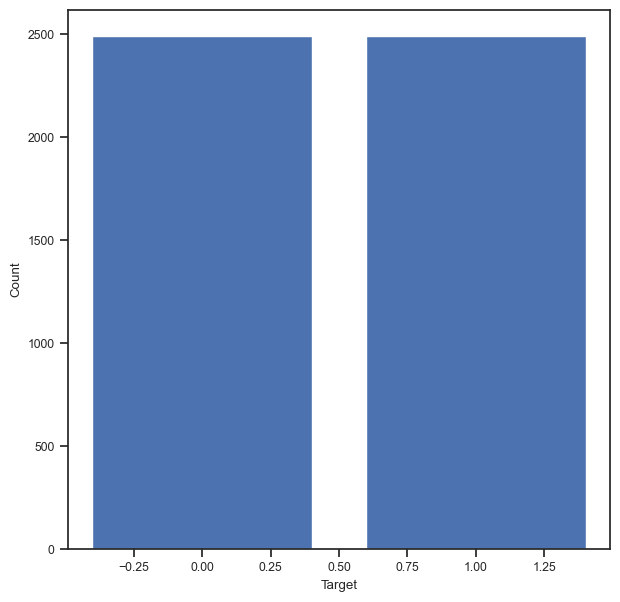

In [84]:
# undersample the majority class

undersample = RandomUnderSampler(random_state=0)
X_balance, Y_balance = undersample.fit_resample(x_scaled, y)

# summarize distribution
counter = Counter(Y_balance)
for k,v in counter.items():
	per = v / len(Y_balance) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

#### Modeling and Evaluation

#### Model 1: Logistic Regression

In [85]:
# Divide the balanced dataset to x_train, y_train, x_test, y_test
x_train2 ,x_test2 ,y_train2,y_test2 = train_test_split(X_balance,Y_balance,test_size=.3,random_state=42,shuffle=True)

# check the dataset dimensionality
print("\n[TRAINING SET FEATURES SHAPE]\n {}".format(x_train2.shape))
print("\n[TRAINING SET TARGET SHAPE]\n {}".format(y_train2.shape))
print("\n[TESTING SET FEATURES SHAPE]\n {}".format(x_test2.shape))
print("\n[TESTING SET TARGET SHAPE]\n {}".format(y_test2.shape))


[TRAINING SET FEATURES SHAPE]
 (3493, 31)

[TRAINING SET TARGET SHAPE]
 (3493,)

[TESTING SET FEATURES SHAPE]
 (1497, 31)

[TESTING SET TARGET SHAPE]
 (1497,)


In [86]:
# create an instance of the logistic regression algorithm 
lr2 = LogisticRegression()
lr2.fit(x_train2,y_train2)

# predict the value by fitting the model
y_pred2       = lr2.predict(x_test2)
y_pred_train2 = lr2.predict(x_train2)

# get the accuracy score of the data
score_lr_test2=accuracy_score(y_test2, y_pred2)
score_lr_train2=accuracy_score(y_train2, y_pred_train2)

# Print the result and report
y_true2 = y_test2
print(confusion_matrix(y_true2, y_pred2))
print(classification_report(y_true2, y_pred2))
print("Accurcy     using LR  on test Data  : {:.2f} %".format(np.round(accuracy_score(y_test2, y_pred2),4)*100))




[[450 315]
 [329 403]]
              precision    recall  f1-score   support

           0       0.58      0.59      0.58       765
           1       0.56      0.55      0.56       732

    accuracy                           0.57      1497
   macro avg       0.57      0.57      0.57      1497
weighted avg       0.57      0.57      0.57      1497

Accurcy     using LR  on test Data  : 56.98 %


#### Model 2: KNN

Uses Optuna library to perform hyperparameter tuning for a k-nearest neighbors (KNN) classifier. 

In [87]:
# Create function of optuna to perform hyperparameter tuning
def knn_classifier_optuna (trial,x_train=x_train2,x_test=x_test2,y_train=y_train2,y_test=y_test2):
#define parameters
    params = {
    'n_neighbors'     : trial.suggest_categorical('n_neighbors', [1,3,5,7]), 
    'weights'         : trial.suggest_categorical('weights', ['uniform','distance']),
    'algorithm'       : trial.suggest_categorical('algorithm',['auto','ball_tree','kd_tree','brute']),
    'leaf_size'       : trial.suggest_int('leaf_size', 30, 150),
    'p'               : trial.suggest_int('p', 2, 50),
    
    }
#creat model and pass parameters 
    model2 = KNeighborsClassifier(**params) 
    model2 = KNeighborsClassifier(**params) 
    model2.fit(x_train2, y_train2) 
    prediction2 = model2.predict(x_test2)
    acc2 = accuracy_score(y_test2, prediction2)
    return acc2


# create an Optuna study object 
study2 = optuna.create_study(direction="minimize")
# search for the optimal hyperparameters of a KNN classifier
study2.optimize(knn_classifier_optuna, n_trials=100)

[I 2023-04-04 22:25:27,156] A new study created in memory with name: no-name-f32cbb76-1710-4981-8fbf-db68a0a6ac42
[I 2023-04-04 22:25:28,873] Trial 0 finished with value: 0.8750835003340013 and parameters: {'n_neighbors': 1, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 98, 'p': 33}. Best is trial 0 with value: 0.8750835003340013.
[I 2023-04-04 22:25:30,588] Trial 1 finished with value: 0.87374749498998 and parameters: {'n_neighbors': 1, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 35, 'p': 41}. Best is trial 1 with value: 0.87374749498998.
[I 2023-04-04 22:25:32,205] Trial 2 finished with value: 0.8724114896459586 and parameters: {'n_neighbors': 1, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 108, 'p': 44}. Best is trial 2 with value: 0.8724114896459586.
[I 2023-04-04 22:25:33,947] Trial 3 finished with value: 0.8470273881095525 and parameters: {'n_neighbors': 3, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 120, 'p': 49}. Best is

[I 2023-04-04 22:26:22,048] Trial 33 finished with value: 0.7862391449565799 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 108, 'p': 23}. Best is trial 29 with value: 0.7862391449565799.
[I 2023-04-04 22:26:23,636] Trial 34 finished with value: 0.7895791583166333 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 126, 'p': 14}. Best is trial 29 with value: 0.7862391449565799.
[I 2023-04-04 22:26:25,202] Trial 35 finished with value: 0.8496993987975952 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 112, 'p': 24}. Best is trial 29 with value: 0.7862391449565799.
[I 2023-04-04 22:26:26,853] Trial 36 finished with value: 0.7882431529726119 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 98, 'p': 19}. Best is trial 29 with value: 0.7862391449565799.
[I 2023-04-04 22:26:28,455] Trial 37 finished with v

[I 2023-04-04 22:27:15,766] Trial 66 finished with value: 0.7862391449565799 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 136, 'p': 25}. Best is trial 43 with value: 0.7849031396125584.
[I 2023-04-04 22:27:17,351] Trial 67 finished with value: 0.8490313961255845 and parameters: {'n_neighbors': 3, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 129, 'p': 28}. Best is trial 43 with value: 0.7849031396125584.
[I 2023-04-04 22:27:18,980] Trial 68 finished with value: 0.7855711422845691 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 122, 'p': 35}. Best is trial 43 with value: 0.7849031396125584.
[I 2023-04-04 22:27:20,568] Trial 69 finished with value: 0.7855711422845691 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 123, 'p': 35}. Best is trial 43 with value: 0.7849031396125584.
[I 2023-04-04 22:27:22,150] Trial 70 finished with v

[I 2023-04-04 22:28:08,821] Trial 99 finished with value: 0.8770875083500334 and parameters: {'n_neighbors': 1, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 120, 'p': 21}. Best is trial 43 with value: 0.7849031396125584.


In [88]:
# print the best parameters
print("Number of finished trials: ", len(study2.trials))
print("Best trial:")
trial2 = study2.best_trial

print("  Value: {}".format(trial2.value))
print("  Params: ")

params = []

for key, value in trial2.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

Number of finished trials:  100
Best trial:
  Value: 0.7849031396125584
  Params: 
    n_neighbors: 7
    weights: uniform
    algorithm: ball_tree
    leaf_size: 119
    p: 21


In [89]:
# fit the KNN model with the best parameter above
knn_best2 = KNeighborsClassifier(n_neighbors=7,weights='uniform',algorithm='kd_tree',leaf_size=145,p=22)

knn_best2.fit(x_train2,y_train2)
y_pred_knn2 = knn_best2.predict(x_test2)
y_pred_train_knn2  = knn_best2.predict(x_train2)

# get the accuracy scores of the predicted value  
score_knn_train2=accuracy_score(y_train2, y_pred_train_knn2)
score_knn_test2=accuracy_score(y_test2, y_pred_knn2)


In [90]:
# Print the result and report
print(confusion_matrix(y_true2, y_pred_knn2))
print(classification_report(y_true2, y_pred_knn2))
print("Accurcy     using KNN  on test Data   : {:.2f} %".format(np.round(accuracy_score(y_test2, y_pred_knn2),4)*100))



[[543 222]
 [100 632]]
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       765
           1       0.74      0.86      0.80       732

    accuracy                           0.78      1497
   macro avg       0.79      0.79      0.78      1497
weighted avg       0.79      0.78      0.78      1497

Accurcy     using KNN  on test Data   : 78.49 %


#### Model 3: Decision Tree

In [91]:
# Create a decision tree object
dt2 = DecisionTreeClassifier()

# Define the parameter grid 
param_grid = {
    'max_depth': [1, 2, 3, 4, 5,6,7],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],
    'criterion': ['gini', 'entropy']
}
    
# Create a GridSearchCV object
grid_search2 = GridSearchCV(dt2, param_grid, cv=5, scoring='accuracy')
    
# Fit the GridSearchCV object to the data
grid_search2.fit(x_train2, y_train2)

# Print the best hyperparameters and corresponding mean cross-validation score
print('Best hyperparameters: ', grid_search2.best_params_)
print('Best score: ', grid_search2.best_score_)


Best hyperparameters:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score:  0.6965361896446417


In [92]:
# Fit the best parameter 
dt_best2 = DecisionTreeClassifier(criterion='gini',max_depth=7, min_samples_split= 5,min_samples_leaf= 2)
dt_best2.fit(x_train2,y_train2)

# get the accuracy result
y_pred_dt2 = dt_best2.predict(x_test2)
y_pred_train_dt2 = dt_best2.predict(x_train2)
accuracy_test2 = accuracy_score(y_test2, y_pred_dt2)
accuracy_train2 = accuracy_score(y_train2, y_pred_train_dt2)

# Print the result and report
print(confusion_matrix(y_true2, y_pred_dt2))
print(classification_report(y_true2, y_pred_dt2))
print("Accurcy     using DT  on test Data   : {:.2f} %".format(np.round(accuracy_score(y_test, y_pred_dt),4)*100))


[[525 240]
 [153 579]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       765
           1       0.71      0.79      0.75       732

    accuracy                           0.74      1497
   macro avg       0.74      0.74      0.74      1497
weighted avg       0.74      0.74      0.74      1497

Accurcy     using DT  on test Data   : 77.69 %


#### Model 4: Decision Tree + Kfold  + Bagging

In [93]:
# Using Bagging Lets build 100 decision tree models and average/majority vote prediction

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)   # create an instance of "stratifiedKfold"
num_trees = 100        # specifies the number of trees

# create a bagging classifier and fit it to the training data 
clf_DT_Bag2 = BaggingClassifier(base_estimator=dt_best2, n_estimators=num_trees, random_state=42).fit(x_train2,y_train2)

# perform k-fold cross-validation on the model
results_bag2 = cross_validate(clf_DT_Bag2, x_train2, y_train2, cv=kfold, return_train_score=True)

# calculate accuracy score 
y_pred_dt_bag2= clf_DT_Bag2.predict(x_test2)
score_dtbag_train2=results_bag['train_score'].mean()
score_dtbag_test2=metrics.accuracy_score(y_pred_dt_bag2, y_test2)

In [94]:
# compare the result of 2 DT models

print("Accuracy using Decision Tree- best parameter - Test : ", accuracy_test2)
print("Accuracy using Decision Tree- best parameter - Train :", accuracy_train2)
print ("Accuracy using Decision Tree (Bagging) - Test : ", score_dtbag_test2)
print ("Accuracy using Decision Tree (Bagging) - Train : ", score_dtbag_train2)

Accuracy using Decision Tree- best parameter - Test :  0.7374749498997996
Accuracy using Decision Tree- best parameter - Train : 0.7606641855138849
Accuracy using Decision Tree (Bagging) - Test :  0.8102872411489646
Accuracy using Decision Tree (Bagging) - Train :  0.9126108720065872


In [95]:
# Print the result and report
print(confusion_matrix(y_true2, y_pred_dt_bag2))
print(classification_report(y_true2, y_pred_dt_bag2))

[[631 134]
 [150 582]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       765
           1       0.81      0.80      0.80       732

    accuracy                           0.81      1497
   macro avg       0.81      0.81      0.81      1497
weighted avg       0.81      0.81      0.81      1497



#### Model 5: Random Forest 

In [96]:
# create stratifiedfold instance 
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# specifie number of trees
num_trees = 100

# create RF classsifier and fit it to the training data
clf_RF2 = RandomForestClassifier(n_estimators=num_trees).fit(x_train2, y_train2)

# get the accuracy result 
results2 = cross_validate(clf_RF2, x_train2, y_train2, cv=kfold, return_train_score=True)
y_pred_rf2= clf_RF2.predict(x_test2)
score_rf_train2 = results2['train_score'].mean()
score_rf_test2 = metrics.accuracy_score(clf_RF2.predict(x_test2), y_test2)

print("\nAccuracy using Random Forest - Train : ", score_rf_train2)
print("Accuracy using Random Forest - Test : ", score_rf_test2)



Accuracy using Random Forest - Train :  0.9769539890616616
Accuracy using Random Forest - Test :  0.9285237140948563


#### Model 6: XGBoost

In [97]:
# Define XGBoost model with default parameters
xgb_model2 = xgb.XGBClassifier()

# Define parameter grid
params = {
    "learning_rate": [0.1, 0.01, 0.001],
    "max_depth": [3, 5, 7],
    "n_estimators": [50, 100, 200]
}

In [98]:
# Create GridSearchCV object
grid_search2 = GridSearchCV(
    estimator=xgb_model2,
    param_grid=params,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the GridSearchCV object to the training data
grid_search2.fit(x_train2, y_train2)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [99]:
print("Best parameters:", grid_search2.best_params_)
print("Best score:", grid_search2.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best score: 0.8777586482531328


In [100]:
# Define the best hyperparameters found from grid search
best_params = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

# Create an XGBoost regressor object with the best hyperparameters
xgb_best2 = xgb.XGBClassifier(**best_params)

# Fit the XGBoost model to the training data
xgb_best2.fit(x_train2, y_train2)


# Evaluate the model on the training and testing data
train_score_xgb2 = xgb_best2.score(x_train2, y_train2)
test_score_xgb2 = xgb_best2.score(x_test2, y_test2)
y_pred_xgb2 = xgb_best2.predict(x_test2)
print("\nAccuracy using XGBoosting Model Training score: ", train_score_xgb2)
print("Accuracy using XGBoosting Model Testing score: ", test_score_xgb2)

# print the result report 
print(classification_report(y_true2, y_pred_xgb2))


Accuracy using XGBoosting Model Training score:  0.9550529630689951
Accuracy using XGBoosting Model Testing score:  0.8857715430861723
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       765
           1       0.85      0.92      0.89       732

    accuracy                           0.89      1497
   macro avg       0.89      0.89      0.89      1497
weighted avg       0.89      0.89      0.89      1497



In [101]:
data2 =  {'Model Name':['Linear Regression_no_pca','KNN_no_pca','DT_no_pca','DT-BAG_no_pca','RF_no_pca','XGBoost_no_pca'],
         'Training Score':[score_lr_train2,score_knn_train2, accuracy_train2, score_dtbag_train2, score_rf_train2, train_score_xgb2 ],
         'Testing Score':[score_lr_test2, score_knn_test2, accuracy_test2, score_dtbag_test2, score_rf_test2, test_score_xgb2]
        }

In [102]:
df_model2 = pd.DataFrame(data2)
df_model2

,Model Name,Training Score,Testing Score
0,Linear Regression_no_pca,0.609791,0.569806
1,KNN_no_pca,0.849413,0.784903
2,DT_no_pca,0.760664,0.737475
3,DT-BAG_no_pca,0.912611,0.810287
4,RF_no_pca,0.976954,0.928524
5,XGBoost_no_pca,0.955053,0.885772


#### Plot the ROC curve for each model


In [103]:
# get the predicted probabilites of the positive a for the test set in all models
y_pred_prob_lr2 = lr2.predict_proba(x_test2)[:,1]
y_pred_prob_knn2 = knn_best2.predict_proba(x_test2)[:,1]
y_pred_prob_dt2 = dt_best2.predict_proba(x_test2)[:,1]
y_pred_prob_dt_bagging2 = clf_DT_Bag2.predict_proba(x_test2)[:,1]
y_pred_prob_rf2 = clf_RF2.predict_proba(x_test2)[:,1]
y_pred_prob_xgb2 = xgb_best2.predict_proba(x_test2)[:,1]

In [104]:
# Calculate the ROC curve and AUC score for each model
fpr_lr2, tpr_lr2, thresholds_lr2 = roc_curve(y_true2, y_pred_prob_lr2)
auc_lr2 = roc_auc_score(y_true2, y_pred_prob_lr2)


fpr_knn2, tpr_knn2, thresholds_knn2 = roc_curve(y_true2, y_pred_prob_knn2)
auc_knn2 = roc_auc_score(y_true2, y_pred_prob_knn2)

fpr_dt2, tpr_dt2, thresholds_dt2 = roc_curve(y_true2, y_pred_prob_dt2)
auc_dt2 = roc_auc_score(y_true2, y_pred_prob_dt2)

fpr_dt_bagging2, tpr_dt_bagging2, thresholds_dt_bagging2 = roc_curve(y_true2, y_pred_prob_dt_bagging2)
auc_dt_bagging2= roc_auc_score(y_true2, y_pred_prob_dt_bagging2)

fpr_rf2, tpr_rf2, thresholds_rf2 = roc_curve(y_true2, y_pred_prob_rf2)
auc_rf2 = roc_auc_score(y_true2, y_pred_prob_rf2)

fpr_xgb2, tpr_xgb2, thresholds_xgb2 = roc_curve(y_true2, y_pred_prob_xgb2)
auc_xgb2 = roc_auc_score(y_true2, y_pred_prob_xgb2)

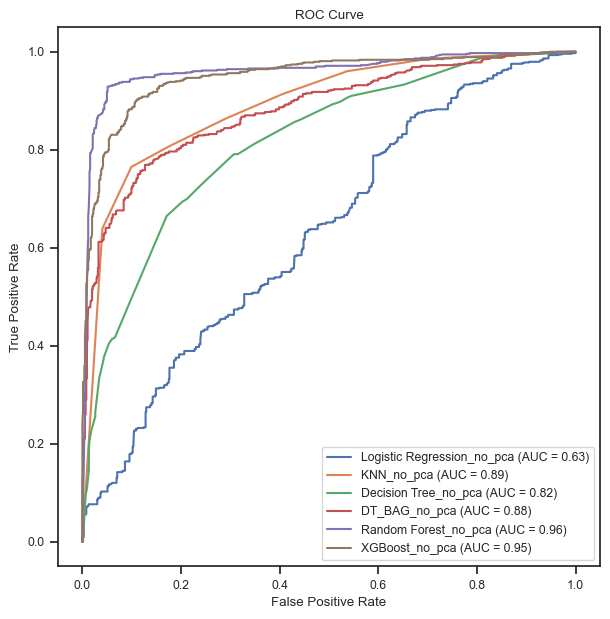

In [105]:
# Plot the ROC curve for each model
plt.plot(fpr_lr2, tpr_lr2, label='Logistic Regression_no_pca (AUC = {:.2f})'.format(auc_lr2))
plt.plot(fpr_knn2, tpr_knn2, label='KNN_no_pca (AUC = {:.2f})'.format(auc_knn2))
plt.plot(fpr_dt2, tpr_dt2, label='Decision Tree_no_pca (AUC = {:.2f})'.format(auc_dt2))
plt.plot(fpr_dt_bagging2, tpr_dt_bagging2, label='DT_BAG_no_pca (AUC = {:.2f})'.format(auc_dt_bagging2))
plt.plot(fpr_rf2, tpr_rf2, label='Random Forest_no_pca (AUC = {:.2f})'.format(auc_rf2))
plt.plot(fpr_xgb2, tpr_xgb2, label='XGBoost_no_pca (AUC = {:.2f})'.format(auc_xgb2))


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Random Forest model has the highest AUC score, indicating it has best overall performance compared to other models. <br> <br> Logistic Regression and Decision Tree models have the lowest AUC score, indicating their performance is relatively poor compared to other models.

### Pipeline 3: Models with Feature Selection (Dataset with PCA)

#### Model 1: Logistic Regression with Feature Selection

In [106]:
# Create a pipeline with feature selection and logistic regression classifier
pipeline_feature_select_logreg = Pipeline([
    ('feature_select', SelectKBest(f_classif)),
    ('logreg', LogisticRegression())
])

# Define the parameter grid for the pipeline
param_grid_feature_select_logreg = {
    'feature_select__k': [5, 10, 15, 20, 25, 30],
    'logreg__C': [0.1, 1, 10],
    'logreg__penalty': ['l1', 'l2']
}

# Perform a grid search to find the best parameters for the pipeline
grid_search_feature_select_logreg = GridSearchCV(pipeline_feature_select_logreg, param_grid=param_grid_feature_select_logreg, cv=5)


# Fit the pipeline on the training data
grid_search_feature_select_logreg.fit(x_train, y_train)

# check the feature selected from the model
print('Number of Feature selected: ', grid_search_feature_select_logreg.best_estimator_.named_steps['feature_select'].get_support().sum())

# get the names of the columns
feature_mask = grid_search_feature_select_logreg.best_estimator_.named_steps['feature_select'].get_support()
feature_names = x_train.columns[feature_mask]

print(feature_names)

Number of Feature selected:  20
Index(['Own_car', 'Own_property', 'ChildNo', 'Income_type', 'Family_status',
       'Housing_type', 'Wkphone', 'Phone', 'Occupation_type_Cleaning staff',
       'Occupation_type_Drivers', 'Occupation_type_HR staff',
       'Occupation_type_High skill tech staff', 'Occupation_type_IT staff',
       'Occupation_type_Laborers', 'Occupation_type_Low-skill Laborers',
       'Occupation_type_Managers', 'Occupation_type_Medicine staff',
       'Occupation_type_Private service staff', 'Occupation_type_Sales staff',
       'Occupation_type_Secretaries'],
      dtype='object')


In [107]:
# get the predicted result and accuracy score
y_pred_lrft = grid_search_feature_select_logreg.predict(x_test)
accuracy_lrft = accuracy_score(y_test, y_pred_lrft)

print("Accuracy:", accuracy_lrft)

Accuracy: 0.5811623246492986


#### Model 2: Random Forest with Feature Selection

In [108]:
# Create a pipeline with feature selection and random forest classifier
pipeline_feature_select_rf = Pipeline([
    ('feature_select', SelectKBest(f_classif)),
    ('rf', RandomForestClassifier())
])

# Define the parameter grid for the pipeline
param_grid_feature_select_rf = {
    'feature_select__k': [ 10, 15, 20, 25],
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [3, 5, 7],
    'rf__min_samples_leaf': [5, 10, 15]
}

# Perform a grid search to find the best parameters for the pipeline
grid_search_feature_select_rf = GridSearchCV(pipeline_feature_select_rf, param_grid=param_grid_feature_select_rf, cv=5)

# Fit the pipeline on the training data
grid_search_feature_select_rf.fit(x_train, y_train)

# check the feature selected from the model
print('Number of Feature selected: ', grid_search_feature_select_rf.best_estimator_.named_steps['feature_select'].get_support().sum())

# get the names of the columns
feature_mask_rf = grid_search_feature_select_rf.best_estimator_.named_steps['feature_select'].get_support()
feature_names_rf = x_train.columns[feature_mask_rf]

print(feature_names_rf)

Number of Feature selected:  25
Index(['Own_car', 'Own_property', 'ChildNo', 'Income', 'Income_type',
       'Education', 'Family_status', 'Housing_type', 'Wkphone', 'Phone', 'AGE',
       'Occupation_type_Cleaning staff', 'Occupation_type_Cooking staff',
       'Occupation_type_Drivers', 'Occupation_type_HR staff',
       'Occupation_type_High skill tech staff', 'Occupation_type_IT staff',
       'Occupation_type_Laborers', 'Occupation_type_Low-skill Laborers',
       'Occupation_type_Managers', 'Occupation_type_Medicine staff',
       'Occupation_type_Private service staff',
       'Occupation_type_Realty agents', 'Occupation_type_Sales staff',
       'Occupation_type_Secretaries'],
      dtype='object')


In [109]:
# get the predicted result and accuracy score
y_pred_rfft = grid_search_feature_select_rf.predict(x_test)
accuracy_rfft = accuracy_score(y_test, y_pred_rfft)

print("Accuracy:", accuracy_rfft)

Accuracy: 0.8563794255177021


#### Model 3: Decision Tree with Feature Selection

In [110]:
# Create the feature selection pipeline with a decision tree classifier
pipeline_feature_select_dt = Pipeline([
    ('feature_select', SelectKBest(f_classif)),
    ('dt', DecisionTreeClassifier())
])

# Define the parameter grid for the pipeline
param_grid_feature_select_dt = {
    'feature_select__k': [ 10, 15, 20, 25],
    'dt__max_depth': [5, 10, 15, 20],
    'dt__min_samples_split': [2, 5, 10]
}

# Perform a grid search to find the best parameters for the pipeline
grid_search_feature_select_dt = GridSearchCV(pipeline_feature_select_dt, param_grid=param_grid_feature_select_dt, cv=5)

# Fit the pipeline on the training data
grid_search_feature_select_dt.fit(x_train, y_train)

# check the feature selected from the model
print('Number of Feature selected: ',  grid_search_feature_select_dt.best_estimator_.named_steps['feature_select'].get_support().sum())

# get the names of the columns
feature_mask_dt = grid_search_feature_select_dt.best_estimator_.named_steps['feature_select'].get_support()
feature_names_dt = x_train.columns[feature_mask_dt]

print(feature_names_dt)


Number of Feature selected:  25
Index(['Own_car', 'Own_property', 'ChildNo', 'Income', 'Income_type',
       'Education', 'Family_status', 'Housing_type', 'Wkphone', 'Phone', 'AGE',
       'Occupation_type_Cleaning staff', 'Occupation_type_Cooking staff',
       'Occupation_type_Drivers', 'Occupation_type_HR staff',
       'Occupation_type_High skill tech staff', 'Occupation_type_IT staff',
       'Occupation_type_Laborers', 'Occupation_type_Low-skill Laborers',
       'Occupation_type_Managers', 'Occupation_type_Medicine staff',
       'Occupation_type_Private service staff',
       'Occupation_type_Realty agents', 'Occupation_type_Sales staff',
       'Occupation_type_Secretaries'],
      dtype='object')


In [111]:
# get the predicted result and accuracy score
y_pred_dtft = grid_search_feature_select_dt.predict(x_test)
accuracy_dtft = accuracy_score(y_test, y_pred_dtft)

print("Accuracy:", accuracy_dtft)

Accuracy: 0.8824315297261189


#### Model 4: KNN with Feature Selection

In [112]:
# Create the feature selection pipeline with a knn classifier
pipeline_feature_select_knn = Pipeline([
    ('feature_select', SelectKBest(f_classif)),
    ('knn', KNeighborsClassifier())
])

# Define the parameter grid for the pipeline
param_grid_feature_select_knn = {
    'feature_select__k': [10, 15, 20, 25],
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance']
}

# Perform a grid search to find the best parameters for the pipeline
grid_search_feature_select_knn = GridSearchCV(pipeline_feature_select_knn, param_grid=param_grid_feature_select_knn, cv=5)

# Fit the pipeline on the training data
grid_search_feature_select_knn.fit(x_train, y_train)

# check the feature selected from the model
print('Number of Feature selected: ',  grid_search_feature_select_knn.best_estimator_.named_steps['feature_select'].get_support().sum())

# get the names of the columns
feature_mask_dt = grid_search_feature_select_knn.best_estimator_.named_steps['feature_select'].get_support()
feature_names_dt = x_train.columns[feature_mask_dt]

print(feature_names_dt)


Number of Feature selected:  15
Index(['Own_car', 'Own_property', 'ChildNo', 'Income_type', 'Family_status',
       'Wkphone', 'Phone', 'Occupation_type_Cleaning staff',
       'Occupation_type_High skill tech staff',
       'Occupation_type_Low-skill Laborers', 'Occupation_type_Managers',
       'Occupation_type_Medicine staff',
       'Occupation_type_Private service staff', 'Occupation_type_Sales staff',
       'Occupation_type_Secretaries'],
      dtype='object')


In [113]:
# get the predicted result and accuracy score
y_pred_knnft = grid_search_feature_select_knn.predict(x_test)
accuracy_knnft = accuracy_score(y_test, y_pred_knnft)

print("Accuracy:", accuracy_knnft)

Accuracy: 0.8690714762859052


In [114]:
data3 =  {'Model Name':['Linear Regression_feature_selection','KNN_feature_selection','DT_feature_selection','RF_feature_selection'],
         'Testing Score':[accuracy_lrft, accuracy_knnft,accuracy_dtft, accuracy_rfft]
        }

In [115]:
df_model3 = pd.DataFrame(data3)
df_model3

,Model Name,Testing Score
0,Linear Regression_feature_selection,0.581162
1,KNN_feature_selection,0.869071
2,DT_feature_selection,0.882432
3,RF_feature_selection,0.856379


#### Plot the ROC curve for each model

In [116]:
# get the predicted probabilites of the positive a for the test set in all models
y_proba_dt = grid_search_feature_select_dt.best_estimator_.predict_proba(x_test)
y_proba_rf= grid_search_feature_select_rf.best_estimator_.predict_proba(x_test)
y_proba_knn= grid_search_feature_select_knn.best_estimator_.predict_proba(x_test)
y_proba_lr = grid_search_feature_select_logreg.best_estimator_.predict_proba(x_test)

In [117]:
# Calculate the ROC curve and AUC score for each model
fpr_lr3, tpr_lr3, thresholds_lr3 = roc_curve(y_true, y_proba_lr[:,1])
auc_lr3 = roc_auc_score(y_true, y_proba_lr[:,1])


fpr_knn3, tpr_knn3, thresholds_knn3 = roc_curve(y_true, y_proba_knn[:,1])
auc_knn3 = roc_auc_score(y_true, y_proba_knn[:,1])

fpr_dt3, tpr_dt3, thresholds_dt3 = roc_curve(y_true, y_proba_dt[:,1])
auc_dt3 = roc_auc_score(y_true, y_proba_dt[:,1])

fpr_rf3, tpr_rf3, thresholds_rf3 = roc_curve(y_true, y_proba_rf[:,1])
auc_rf3 = roc_auc_score(y_true, y_proba_rf[:,1])



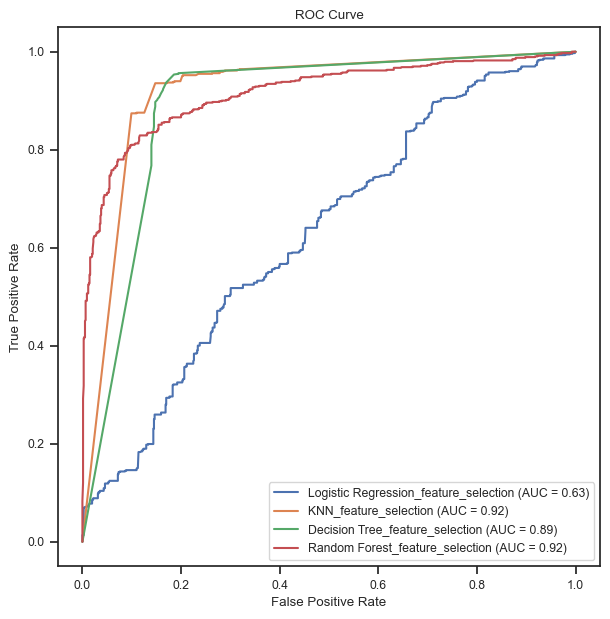

In [118]:
# Plot the ROC curve for each model
plt.plot(fpr_lr3, tpr_lr3, label='Logistic Regression_feature_selection (AUC = {:.2f})'.format(auc_lr3))
plt.plot(fpr_knn3, tpr_knn3, label='KNN_feature_selection (AUC = {:.2f})'.format(auc_knn3))
plt.plot(fpr_dt3, tpr_dt3, label='Decision Tree_feature_selection (AUC = {:.2f})'.format(auc_dt3))
plt.plot(fpr_rf3, tpr_rf3, label='Random Forest_feature_selection (AUC = {:.2f})'.format(auc_rf3))



plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

KNN model and Random Forest models have the highest AUC score, indicating they have best overall performance compared to other models. <br> <br>

Logistic Regression has the lowest AUC score, indicating its performance is relatively poor compared to other models.

## V. Model Selection and Conclusion

In [119]:
# combine the dataframe result following 3 pipeplines
df_model123 = pd.DataFrame({'Model Name': df_model['Model Name'], 
                            'Testing Score(PCA)':df_model['Testing Score'],
                            'Testing Score(No PCA)':df_model2['Testing Score'],
                            'Testing Score(Feature Selection)': df_model3['Testing Score']
                           })
df_model123.loc[3,'Testing Score(Feature Selection)'] = 'NaN'
df_model123.loc[4,'Testing Score(Feature Selection)'] ='0.847027'

In [120]:
# show the result
df_model123

,Model Name,Testing Score(PCA),Testing Score(No PCA),Testing Score(Feature Selection)
0,Linear Regression,0.573814,0.569806,0.581162
1,KNN,0.790915,0.784903,0.869071
2,DT,0.776887,0.737475,0.882432
3,DT-BAG,0.869739,0.810287,NaN
4,RF,0.923180,0.928524,0.847027
5,XGBoost,0.918504,0.885772,NaN


It appears that the Random Forest model had the highest testing score for the "No PCA" and "with PCA" scenarios, while the DT model had the highest testing score for the "Feature Selection" scenario. <br> <br> Also, the scores of models using PCA is better than those without using PCA. KNN in Feature selection pipeline has better performance than in other pipelines, same as DT model. <br> <br>Apart from that, the ROC curves in 3 pipelines also show that the Random Forest has the best performance, followed by the XGBoost.  

#### Overall, the ROC curve and accuracy results suggest that the<span style="color:red"> Random Forest model </span> in pipeline 2 had the best performance among all the models. The RF model in pipeline 1 and XGBoost in pipeline 1 can be alternative choices if other specific requirements need to be considered in reality.